# Credit EDA Assignment

## Business Objective
This Assignment aims at identifying the various factors in BFSI that lead to default paymnets in loans, so that at the time of lending money to customers the bank or the financial institution does not face any money loss. The company can utilise this knowledge for its portfolio and risk assessment.

This case study aims to identify patterns which indicate if a client has difficulty paying their installments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers those who are capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.

In [1]:
# Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# To make all the columns and rows visible

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
#loading the application_data.csv file and reading the dataset

app_data = pd.read_csv(r'C:\Users\admin\Desktop\Main Program\EDA Assignment\application_data.csv')
app_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

In [4]:
#Shape of the dataset

app_data.shape

(307511, 122)

In [5]:
# Different columns of the application dataset

app_data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [6]:
# Checking the Mathematical parameters of the dataset

app_data.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               307511.000000  307511.000000  307511.000000   
mean                     0.020868  -16036.995067   63815.045904   
std                      0.013831    4363.988632  141275.766519   
min                      0.000290  -25229.000000  -17912.000000   
25%                      0.010006  -19682.000000   -2760.000000   
50%                      0.018850  -15750.000000   -1213.000000   
75%                      0.028663  -12413.000000    -289.000000   
max                      0.072508   -7489.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH    OWN_CAR_AGE     FLAG_MOBIL  \
count      307511.000000    307511.000000  104582.000000  307511.000000   
mean        -4986.120328     -2994.202373      12.061091       0.999997   
std          3522.886321      1509.450419      11.944812       0.001803   
min        -24672.000000     -7197.000000       0.000000       0.000000   
25%         -7479.500000     -4299.000000       5.000000       1.000000   
50%         -4504.000000     -3254.000000       9.000000       1.000000   
75%         -2010.000000     -1720.000000      15.000000       1.000000   
max             0.000000         0.000000      91.000000       1.000000   

       FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE  \
count   307511.000000    307511.000000     307511.000000  307511.000000   
mean         0.819889         0.199368          0.998133       0.281066   
std          0.384280         0.399526          0.043164       0.449521   
min          0.000000         0.000000          0.000000       0.000000   
25%          1.000000         0.000000          1.000000       0.000000   
50%          1.000000         0.000000          1.000000       0.000000   
75%          1.000000         0.000000          1.000000       1.000000   
max          1.000000         1.000000          1.000000       1.000000   

          FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count  307511.000000    307509.000000         307511.000000   
mean        0.056720         2.152665              2.052463   
std         0.231307         0.910682              0.509034   
min         0.000000         1.000000              1.000000   
25%         0.000000         2.000000              2.000000   
50%         0.000000         2.000000              2.000000   
75%         0.000000         3.000000              2.000000   
max         1.000000        20.000000              3.000000   

       REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
count                307511.000000            307511.000000   
mean                      2.031521                12.063419   
std                       0.502737                 3.265832   
min                       1.000000                 0.000000   
25%                       

In [7]:
# Checking the data set info

app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [8]:
# Checking the datatypes of the dataset

app_data.dtypes

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
OWN_CAR_AGE                     float64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64


## STEP 1: Identify the Missing Values and Rectify them

In [9]:
# calculate the percentage of missing values in the entire dataset

app_data.isnull().mean()*100

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
OWN_CAR_AGE                     65.990810
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0

In [10]:
# find columns with missing values that are greater than 40%

cut_off = 40
cols_to_drop = list(app_data.columns[app_data.isnull().mean()*100>=cut_off])
cols_to_drop

['OWN_CAR_AGE',
 'EXT_SOURCE_1',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAREA_MEDI',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'TOTALAREA_MOD

In [11]:
# Dropping these columns with null values >40%
# These columns have missing values greater than 45% which means this data is inconsitent and would create inconsitency in analysis. 

app_data.drop(cols_to_drop, axis = 1, inplace = True)

In [12]:
# checking the shape of the dataset after dropping the columns

app_data.shape

(307511, 73)

In [13]:
app_data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_C

##### There are certain columns that are not relevant to the Target column analysis. As we understand that:

- Target column with value 1 indicates: client with payment difficulties, i.e. it is for defaulters
- Target column with value 0 indicated: clients which are not defaulters

So there are ceratin columns which would not impact the defaulters data in the dataset. So dropping those columns would ease out the data a bit to make analysis


In [14]:
# Obtaining the flag columns all at once using for loop

flag_cols = []

for col in app_data.columns:
    if col.startswith('FLAG'):
        flag_cols.append(col)
flag_cols

['FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21']

In [15]:
#We might need flag_own_car and flag_own_realty for analysis to understand if owning car and properties might affect on defaulting loan or not
#so we can keep those two columns and drop the remaining


flag_cols_updated = ['FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE','FLAG_PHONE','FLAG_EMAIL','FLAG_DOCUMENT_2',
                     'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_6','FLAG_DOCUMENT_7','FLAG_DOCUMENT_8',
                     'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13','FLAG_DOCUMENT_14',
                     'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17','FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21']

In [16]:
app_data.drop(flag_cols_updated, axis = 1, inplace = True)

In [17]:
#Checking the data types after dropping unnecessary columns

app_data.dtypes

SK_ID_CURR                       int64
TARGET                           int64
NAME_CONTRACT_TYPE              object
CODE_GENDER                     object
FLAG_OWN_CAR                    object
FLAG_OWN_REALTY                 object
CNT_CHILDREN                     int64
AMT_INCOME_TOTAL               float64
AMT_CREDIT                     float64
AMT_ANNUITY                    float64
AMT_GOODS_PRICE                float64
NAME_TYPE_SUITE                 object
NAME_INCOME_TYPE                object
NAME_EDUCATION_TYPE             object
NAME_FAMILY_STATUS              object
NAME_HOUSING_TYPE               object
REGION_POPULATION_RELATIVE     float64
DAYS_BIRTH                       int64
DAYS_EMPLOYED                    int64
DAYS_REGISTRATION              float64
DAYS_ID_PUBLISH                  int64
OCCUPATION_TYPE                 object
CNT_FAM_MEMBERS                float64
REGION_RATING_CLIENT             int64
REGION_RATING_CLIENT_W_CITY      int64
WEEKDAY_APPR_PROCESS_STAR

In [18]:
# dropping columns which do not impact the defaulters in the dataset

app_data.drop(['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR'],axis=1,inplace=True)

In [19]:
app_data.drop(['EXT_SOURCE_3','EXT_SOURCE_2'], axis=1,inplace=True)

In [20]:
app_data.shape

(307511, 39)

In [21]:
# Dropping columns which are not relevant to target column:
# The application start time and date has no effect on the defaulters.
# Also the person who is accompanying while applying for loan has no importance
# Before how many number of days before application did client change mobile doesn't give us any insight on the defaulter 

app_data.drop(['WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START', 'NAME_TYPE_SUITE', 'DAYS_LAST_PHONE_CHANGE'],axis=1,inplace=True)

In [22]:
#dropping these at the region level and keeping at the city level, since if the city level addresses are satisfied then obviously the region levels shall also be satisfied

app_data.drop(['REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION'],axis=1,inplace=True)


In [23]:
#final shape of our data with relevant columns

app_data.shape

(307511, 32)

In [24]:
# checking the missing values percentage

app_data.isnull().mean().sort_values(ascending = False)*100

OCCUPATION_TYPE                31.345545
DEF_60_CNT_SOCIAL_CIRCLE        0.332021
OBS_60_CNT_SOCIAL_CIRCLE        0.332021
DEF_30_CNT_SOCIAL_CIRCLE        0.332021
OBS_30_CNT_SOCIAL_CIRCLE        0.332021
AMT_GOODS_PRICE                 0.090403
AMT_ANNUITY                     0.003902
CNT_FAM_MEMBERS                 0.000650
REGION_RATING_CLIENT_W_CITY     0.000000
DAYS_ID_PUBLISH                 0.000000
REGION_RATING_CLIENT            0.000000
REG_CITY_NOT_LIVE_CITY          0.000000
DAYS_EMPLOYED                   0.000000
REG_CITY_NOT_WORK_CITY          0.000000
LIVE_CITY_NOT_WORK_CITY         0.000000
ORGANIZATION_TYPE               0.000000
DAYS_REGISTRATION               0.000000
SK_ID_CURR                      0.000000
TARGET                          0.000000
REGION_POPULATION_RELATIVE      0.000000
NAME_HOUSING_TYPE               0.000000
NAME_FAMILY_STATUS              0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_INCOME_TYPE                0.000000
AMT_CREDIT      

### Data correction in columns

- Imputing/Deleting missing values or letting them be unknown.
- Correcting Data Types if required
- Rectifying the negative values 

#### Dealing with Occupation_Type Column

In [25]:
#Data correction of Occupation type column

app_data['OCCUPATION_TYPE'].isnull().mean()*100

31.345545362604916

In [26]:
app_data['OCCUPATION_TYPE'].value_counts()

OCCUPATION_TYPE
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: count, dtype: int64

In [27]:
app_data['OCCUPATION_TYPE'].unique()

array(['Laborers', 'Core staff', 'Accountants', 'Managers', nan,
       'Drivers', 'Sales staff', 'Cleaning staff', 'Cooking staff',
       'Private service staff', 'Medicine staff', 'Security staff',
       'High skill tech staff', 'Waiters/barmen staff',
       'Low-skill Laborers', 'Realty agents', 'Secretaries', 'IT staff',
       'HR staff'], dtype=object)

Missing values in the Ocupation Type column is 31%. As occupation type column is a categorical column, usually mode is used to impute the missing data. But in this scenario, mode  i.e., the variable with highest count is laborers. Imputing the missing values with laborers will skew the results. Hence, it would be better to let the missing values as unknown and continue with our analysis. As occupation type is one of the major criteria in deciding the defaulters, the financial insititutions should make sure that the missing values should not be so high in future.

In [28]:
app_data['OCCUPATION_TYPE'].fillna('Unknown', inplace = True)

In [29]:
#Rechecking for null values

app_data['OCCUPATION_TYPE'].isnull().sum()

0

#### Dealing with the columns of Observation of client's social surroundings with Observable/defaulted on 30 DPD (days past due) or 60 DPD

In [30]:
#Having a look at those 4 columns together

app_data[app_data['DEF_60_CNT_SOCIAL_CIRCLE'].isnull()].head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
68        100080       0    Revolving loans           F            N   
394       100457       0    Revolving loans           F            Y   
397       100460       0    Revolving loans           F            N   
457       100527       0    Revolving loans           F            N   
1042      101209       0    Revolving loans           M            Y   

     FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
68                 N             1          157500.0    450000.0      22500.0   
394                Y             0          211500.0    270000.0      13500.0   
397                N             0          315000.0    540000.0      27000.0   
457                N             0          112500.0    270000.0      13500.0   
1042               N             0          180000.0    540000.0      27000.0   

      AMT_GOODS_PRICE      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
68           450000.0  Commercial associate  Secondary / secondary special   
394          270000.0               Working               Higher education   
397          540000.0  Commercial associate               Higher education   
457          270000.0  Commercial associate               Higher education   
1042         540000.0  Commercial associate               Higher education   

        NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
68          Civil marriage  House / apartment                    0.010966   
394   Single / not married  House / apartment                    0.006008   
397   Single / not married   Rented apartment                    0.014464   
457         Civil marriage  House / apartment                    0.026392   
1042               Married  House / apartment                    0.025164   

      DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
68        -11956          -3154            -8118.0            -4143   
394        -8922           -728            -8882.0              -66   
397        -9842           -157            -2291.0            -2291   
457        -9393           -992            -4145.0            -2081   
1042      -18800          -5516            -5862.0            -2306   

     OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
68       Sales staff              3.0                     2   
394       Core staff              1.0                     2   
397          Unknown              1.0                     2   
457      Accountants              2.0                     2   
1042        Laborers              2.0                     2   

      REGION_RATING_CLIENT_W_CITY  REG_CITY_NOT_LIVE_CITY  \
68                              2                       0   
394                             2                       1   
397                             2                       0   
457                             2                       1   
1042                            2                       0   

      REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  \
68                         0                        0            Kindergarten   
394                        1                        0           Trade: type 2   
397                        0                        0  Business Entity Type 3   
457                        1                        0                    Bank   
1042                       0                        0                   Other   

      OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
68                         NaN                       NaN   
394                        NaN                       NaN   
397                        NaN                       NaN   
457                        NaN                       NaN   
1042                       NaN                       NaN   

      OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  
68                         NaN                       NaN  
394            

In [31]:
app_data['DEF_60_CNT_SOCIAL_CIRCLE'].dtypes

dtype('float64')

In [32]:
DPD = []

for col in app_data.columns:
    if col.endswith('SOCIAL_CIRCLE'):
        DPD.append(col)

DPD

['OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE']

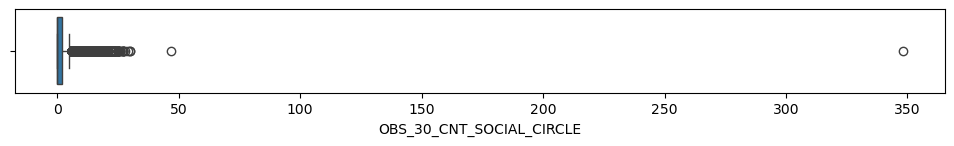

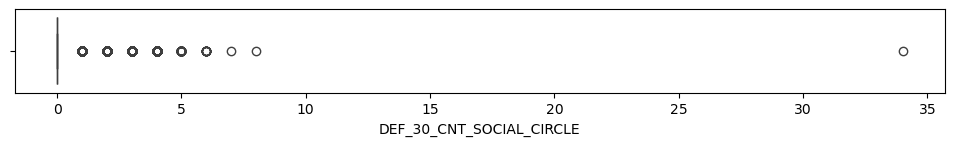

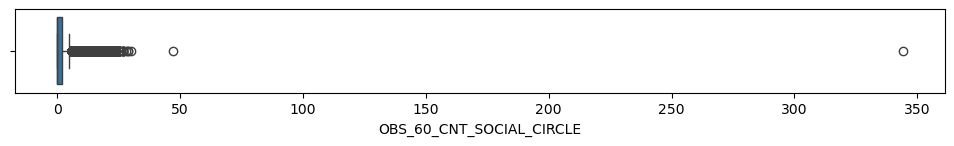

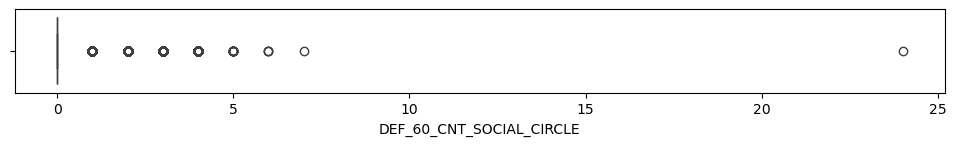

In [33]:
#plotting boxplots

for i, col in enumerate(DPD):
    plt.figure(figsize = [12,5])
    plt.subplot(4,1,i+1)
    sns.boxplot(data=app_data,x=col)



In [34]:
#Checking the null value percentage

app_data[DPD].isnull().mean()*100

OBS_30_CNT_SOCIAL_CIRCLE    0.332021
DEF_30_CNT_SOCIAL_CIRCLE    0.332021
OBS_60_CNT_SOCIAL_CIRCLE    0.332021
DEF_60_CNT_SOCIAL_CIRCLE    0.332021
dtype: float64

From the above plots we can observe that in boxplots, box is rarely visible and it is due to the presence of lots of outliers. In the presence of outliers, median is the best imputation method rather than mean. Because mean takes the outliers into the consideration and it skews the results. Therefore, we shall impute the missing values which is 0.33% in the DPD columns with median. 

In [35]:
for col in DPD:
    app_data[col] =app_data[col].fillna(app_data[col].median())

In [36]:
#Rechecking the null values

app_data[DPD].isnull().mean()*100

OBS_30_CNT_SOCIAL_CIRCLE    0.0
DEF_30_CNT_SOCIAL_CIRCLE    0.0
OBS_60_CNT_SOCIAL_CIRCLE    0.0
DEF_60_CNT_SOCIAL_CIRCLE    0.0
dtype: float64

In [37]:
app_data.OBS_30_CNT_SOCIAL_CIRCLE.value_counts()

OBS_30_CNT_SOCIAL_CIRCLE
0.0      164931
1.0       48783
2.0       29808
3.0       20322
4.0       14143
5.0        9553
6.0        6453
7.0        4390
8.0        2967
9.0        2003
10.0       1376
11.0        852
12.0        652
13.0        411
14.0        258
15.0        166
16.0        133
17.0         88
18.0         46
19.0         44
20.0         30
21.0         29
22.0         22
23.0         15
25.0         11
24.0         11
27.0          5
26.0          3
30.0          2
28.0          1
29.0          1
47.0          1
348.0         1
Name: count, dtype: int64

In [38]:
app_data.OBS_60_CNT_SOCIAL_CIRCLE.value_counts()

OBS_60_CNT_SOCIAL_CIRCLE
0.0      165687
1.0       48870
2.0       29766
3.0       20215
4.0       13946
5.0        9463
6.0        6349
7.0        4344
8.0        2886
9.0        1959
10.0       1335
11.0        837
12.0        620
13.0        401
14.0        238
15.0        166
16.0        137
17.0         73
18.0         49
19.0         44
20.0         30
21.0         28
22.0         20
23.0         13
24.0         12
25.0         11
27.0          5
29.0          2
28.0          1
47.0          1
344.0         1
30.0          1
26.0          1
Name: count, dtype: int64

In [39]:
app_data.DEF_30_CNT_SOCIAL_CIRCLE.value_counts()

DEF_30_CNT_SOCIAL_CIRCLE
0.0     272345
1.0      28328
2.0       5323
3.0       1192
4.0        253
5.0         56
6.0         11
7.0          1
34.0         1
8.0          1
Name: count, dtype: int64

In [40]:
app_data.DEF_60_CNT_SOCIAL_CIRCLE.value_counts()

DEF_60_CNT_SOCIAL_CIRCLE
0.0     281742
1.0      21841
2.0       3170
3.0        598
4.0        135
5.0         20
6.0          3
7.0          1
24.0         1
Name: count, dtype: int64

In [41]:
#Total null count in percentage

app_data.isnull().mean().sort_values(ascending = False)*100

AMT_GOODS_PRICE                0.090403
AMT_ANNUITY                    0.003902
CNT_FAM_MEMBERS                0.000650
SK_ID_CURR                     0.000000
DAYS_ID_PUBLISH                0.000000
OCCUPATION_TYPE                0.000000
REGION_RATING_CLIENT           0.000000
REGION_RATING_CLIENT_W_CITY    0.000000
REG_CITY_NOT_LIVE_CITY         0.000000
DAYS_EMPLOYED                  0.000000
REG_CITY_NOT_WORK_CITY         0.000000
LIVE_CITY_NOT_WORK_CITY        0.000000
ORGANIZATION_TYPE              0.000000
OBS_30_CNT_SOCIAL_CIRCLE       0.000000
DEF_30_CNT_SOCIAL_CIRCLE       0.000000
OBS_60_CNT_SOCIAL_CIRCLE       0.000000
DAYS_REGISTRATION              0.000000
DAYS_BIRTH                     0.000000
TARGET                         0.000000
REGION_POPULATION_RELATIVE     0.000000
NAME_HOUSING_TYPE              0.000000
NAME_FAMILY_STATUS             0.000000
NAME_EDUCATION_TYPE            0.000000
NAME_INCOME_TYPE               0.000000
AMT_CREDIT                     0.000000


#### Dealing with AMT_GOODS_PRICE Column

In [42]:
#checking the data type of the column

app_data['AMT_GOODS_PRICE'].dtypes

dtype('float64')

In [43]:
app_data['AMT_GOODS_PRICE'].describe()

count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

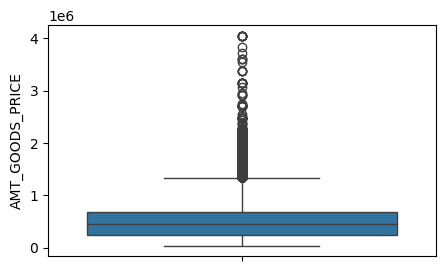

In [44]:
plt.figure(figsize = [5,3])
sns.boxplot(app_data['AMT_GOODS_PRICE'])
plt.show()

In [45]:
app_data['AMT_GOODS_PRICE'].isnull().mean()*100

0.09040327012692229

In [46]:
#The missing values in this column can be dealt by imputing them or by dropping them.
#since the percentage of missing values is 0.09 which is very insignificant
#Here we can proceed with imputation with median since there are outliers and median is preferred to mean in numerical column

app_data['AMT_GOODS_PRICE'] = app_data['AMT_GOODS_PRICE'].fillna(app_data['AMT_GOODS_PRICE'].median())

In [47]:
#Rechecking null count

app_data['AMT_GOODS_PRICE'].isnull().mean()*100

0.0

#### Dealing with AMT_ANNUITY

In [48]:
app_data['AMT_ANNUITY'].describe()

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

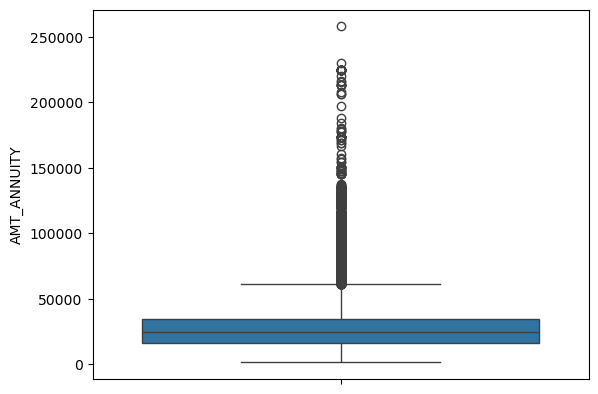

In [49]:
sns.boxplot(app_data['AMT_ANNUITY'])
plt.show()

In [50]:
# Imputing the missing values which is 0.0039% with median due to the presence of outliers because of which mean cannot be used

app_data['AMT_ANNUITY'] = app_data['AMT_ANNUITY'].fillna(app_data['AMT_ANNUITY'].median())

##### Dealing with CNT_FAM_MEMBERS and DAYS_LAST_PHONE_CHANGE columns

In [51]:
app_data['CNT_FAM_MEMBERS'].describe()

count    307509.000000
mean          2.152665
std           0.910682
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          20.000000
Name: CNT_FAM_MEMBERS, dtype: float64

In [52]:
#checking the value_counts

app_data['CNT_FAM_MEMBERS'].value_counts()

CNT_FAM_MEMBERS
2.0     158357
1.0      67847
3.0      52601
4.0      24697
5.0       3478
6.0        408
7.0         81
8.0         20
9.0          6
10.0         3
14.0         2
12.0         2
20.0         2
16.0         2
13.0         1
15.0         1
11.0         1
Name: count, dtype: int64

In [53]:
app_data['CNT_FAM_MEMBERS'].isnull().sum()

2

In [54]:
#Replacing the null values with mode (i.e., 2) which is the mostly occured value. Since the missing value count,2 is very insignificant. 
#These values can also be dropped. However, here, let's replace with mode

In [55]:
#Calculating the mode

cnt_fam_mode = app_data['CNT_FAM_MEMBERS'].mode()[0]
cnt_fam_mode

2.0

In [56]:
app_data['CNT_FAM_MEMBERS'] = app_data['CNT_FAM_MEMBERS'].fillna(cnt_fam_mode)


In [57]:
app_data['CNT_FAM_MEMBERS'].dtypes

dtype('float64')

In [58]:
#Changing CNT_FAM_MEMBERS from float to int as count of members is a whole number

app_data['CNT_FAM_MEMBERS'] =app_data['CNT_FAM_MEMBERS'].astype(int)

In [59]:
app_data['CNT_FAM_MEMBERS'].dtypes

dtype('int32')

In [60]:
#Checking null count

app_data.isnull().sum()

SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
AMT_GOODS_PRICE                0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
OCCUPATION_TYPE                0
CNT_FAM_MEMBERS                0
REGION_RATING_CLIENT           0
REGION_RATING_CLIENT_W_CITY    0
REG_CITY_NOT_LIVE_CITY         0
REG_CITY_NOT_WORK_CITY         0
LIVE_CITY_NOT_WORK_CITY        0
ORGANIZATION_TYPE              0
OBS_30_CNT_SOCIAL_CIRCLE       0
DEF_30_CNT_SOCIAL_CIRCLE       0
OBS_60_CNT

All the null values have been imputed. However there will be missing values in some other formats as well like 'NA' or 'X' etc. So it's important to check those and group them as unknown or impute them. We can identify them with the help of value_counts command. It's also necessary to do sanity checks on the columns.


In [61]:
app_data['NAME_CONTRACT_TYPE'].value_counts()

NAME_CONTRACT_TYPE
Cash loans         278232
Revolving loans     29279
Name: count, dtype: int64

In [62]:
app_data['CODE_GENDER'].value_counts()

CODE_GENDER
F      202448
M      105059
XNA         4
Name: count, dtype: int64

In [63]:
app_data.shape

(307511, 32)

As we see there are some misisng values with XNA in the CODE_GENDER column. Since the missing value is very small, we can impute it with mode - F since it's almost double the size of M.Or we can also drop those rows. Here, let's drop them


In [64]:
app_data = app_data[-(app_data['CODE_GENDER'] == 'XNA')]

In [65]:
app_data.shape

(307507, 32)

In [66]:
#checking the data type of Flag_own_car

app_data['FLAG_OWN_CAR'].dtypes

dtype('O')

In [67]:
app_data['FLAG_OWN_CAR'].value_counts()

FLAG_OWN_CAR
N    202922
Y    104585
Name: count, dtype: int64

In [68]:
#Converting the Object Data type to int data type

app_data['FLAG_OWN_CAR'] = app_data['FLAG_OWN_CAR'].replace({'N': 0, 'Y': 1})

In [69]:
#Rechecking the values

app_data['FLAG_OWN_CAR'].value_counts()

FLAG_OWN_CAR
0    202922
1    104585
Name: count, dtype: int64

In [70]:
app_data['FLAG_OWN_CAR'].dtypes

dtype('int64')

In [71]:
# Performing the same operations as above on FLAG_OWN_REALTY as well

app_data['FLAG_OWN_REALTY'].value_counts()
app_data['FLAG_OWN_REALTY'] = app_data['FLAG_OWN_REALTY'].replace({'N': 0, 'Y': 1})


In [72]:
app_data['FLAG_OWN_REALTY'].value_counts()

FLAG_OWN_REALTY
1    213308
0     94199
Name: count, dtype: int64

In [73]:
#Checking the values in the children column

app_data.CNT_CHILDREN.value_counts()

CNT_CHILDREN
0     215369
1      61118
2      26748
3       3717
4        429
5         84
6         21
7          7
14         3
8          2
9          2
12         2
10         2
19         2
11         1
Name: count, dtype: int64

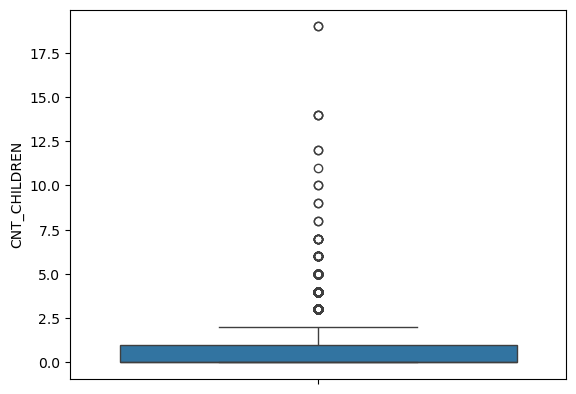

In [74]:
sns.boxplot(app_data.CNT_CHILDREN)
plt.show()

#Outliers shall be dealt with in the next section

In [75]:
app_data.dtypes

SK_ID_CURR                       int64
TARGET                           int64
NAME_CONTRACT_TYPE              object
CODE_GENDER                     object
FLAG_OWN_CAR                     int64
FLAG_OWN_REALTY                  int64
CNT_CHILDREN                     int64
AMT_INCOME_TOTAL               float64
AMT_CREDIT                     float64
AMT_ANNUITY                    float64
AMT_GOODS_PRICE                float64
NAME_INCOME_TYPE                object
NAME_EDUCATION_TYPE             object
NAME_FAMILY_STATUS              object
NAME_HOUSING_TYPE               object
REGION_POPULATION_RELATIVE     float64
DAYS_BIRTH                       int64
DAYS_EMPLOYED                    int64
DAYS_REGISTRATION              float64
DAYS_ID_PUBLISH                  int64
OCCUPATION_TYPE                 object
CNT_FAM_MEMBERS                  int32
REGION_RATING_CLIENT             int64
REGION_RATING_CLIENT_W_CITY      int64
REG_CITY_NOT_LIVE_CITY           int64
REG_CITY_NOT_WORK_CITY   

In [76]:
#Getting a list of days related columns

days_col = []

for col in app_data.columns:
    if col.startswith('DAY'):
        days_col.append(col)
days_col

['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH']

In [77]:
app_data[days_col].head()

DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH
0       -9461           -637            -3648.0            -2120
1      -16765          -1188            -1186.0             -291
2      -19046           -225            -4260.0            -2531
3      -19005          -3039            -9833.0            -2437
4      -19932          -3038            -4311.0            -3458

From the above 5 observations we can note that there are several rows with negative days which is not possible. Hence, we have to change them to positive using abs function

In [78]:
days_col

['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH']

In [79]:
for col in days_col:
    app_data[col] = abs(app_data[col])

In [80]:
app_data[days_col].head()

#Hence the negative days are successfully converted into positive

DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH
0        9461            637             3648.0             2120
1       16765           1188             1186.0              291
2       19046            225             4260.0             2531
3       19005           3039             9833.0             2437
4       19932           3038             4311.0             3458

In [81]:
app_data.REGION_RATING_CLIENT.value_counts()

REGION_RATING_CLIENT
2    226981
3     48329
1     32197
Name: count, dtype: int64

In [82]:
app_data.REGION_RATING_CLIENT_W_CITY.value_counts()

REGION_RATING_CLIENT_W_CITY
2    229481
3     43859
1     34167
Name: count, dtype: int64

In [83]:
app_data.REG_CITY_NOT_LIVE_CITY.value_counts()

REG_CITY_NOT_LIVE_CITY
0    283468
1     24039
Name: count, dtype: int64

In [84]:
app_data.REG_CITY_NOT_WORK_CITY.value_counts()


REG_CITY_NOT_WORK_CITY
0    236640
1     70867
Name: count, dtype: int64

In [85]:
app_data.LIVE_CITY_NOT_WORK_CITY.value_counts()

LIVE_CITY_NOT_WORK_CITY
0    252292
1     55215
Name: count, dtype: int64

In [86]:
app_data.ORGANIZATION_TYPE.value_counts()

ORGANIZATION_TYPE
Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11192
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6879
Construction               6721
Business Entity Type 1     5983
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3277
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7      

Organization Type has some values marked as XNA which are unknown. So creating a new category Unknown by replacing 'XNA' with 'Unknown' in Organization Column

In [87]:
# Replacing 'XNA' With Unknown

app_data.ORGANIZATION_TYPE.replace('XNA','Unknown',inplace=True)

In [88]:
#Since the amount columns are float i.e., numerical columns, we shall look at the number of unique values

app_data.AMT_INCOME_TOTAL.nunique()

2548

In [89]:
app_data.AMT_CREDIT.nunique()

5603

In [90]:
# NAME_INCOME_TYPE is a catagorical column. All the Object type datas are catagorical. Hence we can check the value_counts

app_data.NAME_INCOME_TYPE.nunique()

8

In [91]:
app_data.NAME_INCOME_TYPE.value_counts()

NAME_INCOME_TYPE
Working                 158771
Commercial associate     71616
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: count, dtype: int64

In [92]:
app_data.NAME_EDUCATION_TYPE.value_counts()

NAME_EDUCATION_TYPE
Secondary / secondary special    218389
Higher education                  74862
Incomplete higher                 10276
Lower secondary                    3816
Academic degree                     164
Name: count, dtype: int64

In [93]:
app_data.NAME_FAMILY_STATUS.value_counts()

NAME_FAMILY_STATUS
Married                 196429
Single / not married     45444
Civil marriage           29774
Separated                19770
Widow                    16088
Unknown                      2
Name: count, dtype: int64

In [94]:
app_data.NAME_HOUSING_TYPE.value_counts()

NAME_HOUSING_TYPE
House / apartment      272865
With parents            14840
Municipal apartment     11182
Rented apartment         4881
Office apartment         2617
Co-op apartment          1122
Name: count, dtype: int64

## Step 2: Outliers

In [95]:
app_data.dtypes

SK_ID_CURR                       int64
TARGET                           int64
NAME_CONTRACT_TYPE              object
CODE_GENDER                     object
FLAG_OWN_CAR                     int64
FLAG_OWN_REALTY                  int64
CNT_CHILDREN                     int64
AMT_INCOME_TOTAL               float64
AMT_CREDIT                     float64
AMT_ANNUITY                    float64
AMT_GOODS_PRICE                float64
NAME_INCOME_TYPE                object
NAME_EDUCATION_TYPE             object
NAME_FAMILY_STATUS              object
NAME_HOUSING_TYPE               object
REGION_POPULATION_RELATIVE     float64
DAYS_BIRTH                       int64
DAYS_EMPLOYED                    int64
DAYS_REGISTRATION              float64
DAYS_ID_PUBLISH                  int64
OCCUPATION_TYPE                 object
CNT_FAM_MEMBERS                  int32
REGION_RATING_CLIENT             int64
REGION_RATING_CLIENT_W_CITY      int64
REG_CITY_NOT_LIVE_CITY           int64
REG_CITY_NOT_WORK_CITY   

In [96]:
# This method might not always give us the exact division of columns into categorical and numerical variables. 
# Hence, this data after obtaing should further be checked and modified.

cat_cols = []
num_cols = []

for col in app_data.columns:
    if app_data[col].nunique()> 30:
        num_cols.append(col)
    else:
        cat_cols.append(col)

In [97]:
cat_cols

['TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE']

In [98]:
num_cols

['SK_ID_CURR',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'ORGANIZATION_TYPE',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE']

After observing, we can say that even though these 2 columns 'CNT_CHILDREN', 'CNT_FAM_MEMBERS' have the unique value less than 30, they should be considered as numerical columns. Also, although the ORGANIZATION_TYPE column has more than 30 unique values it should be considered in categorical column. There is no need to consider SK_ID_CURR column as it is the columns with IDs.


In [99]:

to_be_modified = ['CNT_CHILDREN', 'CNT_FAM_MEMBERS','ORGANIZATION_TYPE', 'SK_ID_CURR']

updated_cat_cols = ['TARGET','NAME_CONTRACT_TYPE', 'CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE',
            'NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE','ORGANIZATION_TYPE','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY',
            'REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY']

len(updated_cat_cols)

16

In [100]:
updated_num_cols = ['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE',
                    'REGION_POPULATION_RELATIVE','DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH',
                    'OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE', 'CNT_CHILDREN', 'CNT_FAM_MEMBERS']

len(updated_num_cols)

15

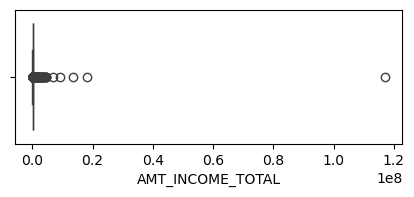

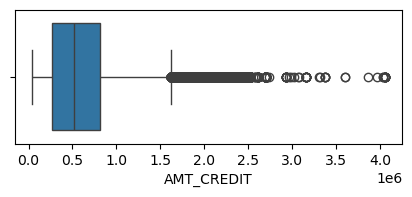

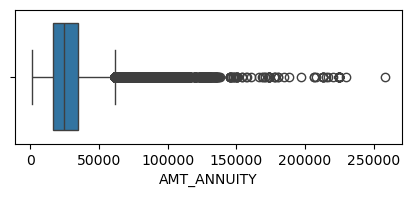

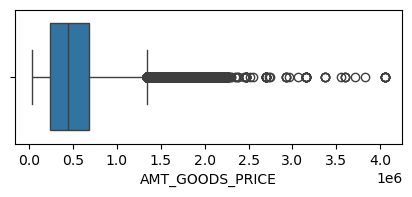

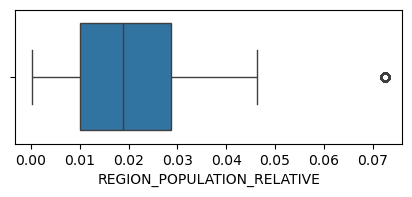

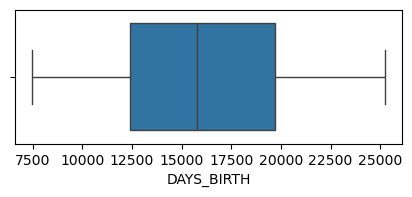

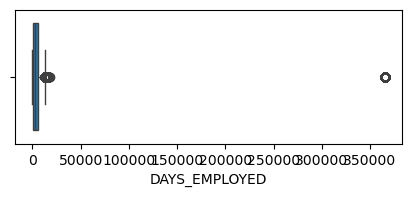

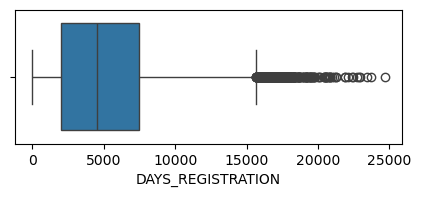

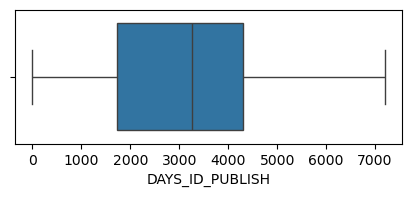

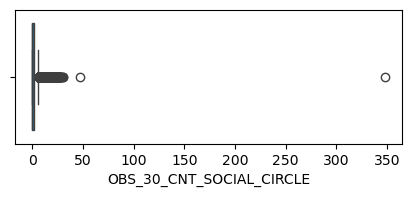

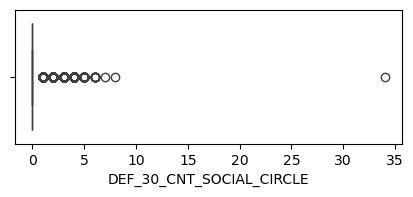

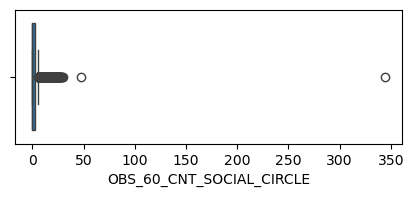

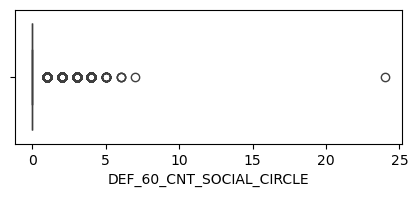

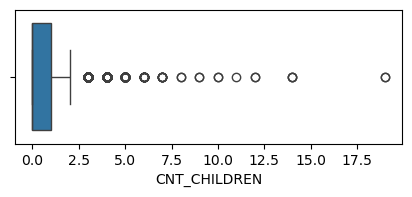

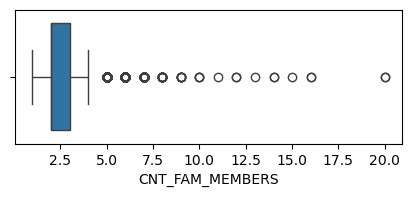

In [101]:

for i, col in enumerate(updated_num_cols):
    plt.figure(figsize = [23,8])
    plt.subplot(4,4,i+1)
    sns.boxplot(data=app_data,x=col)
    plt.show()

Outliers can be handled in 2 ways:

1. We can drop these outliers from the dataframe. Binning is one of the methods that helps us in eliminating the outliers.
2. We can impute these outliers with the upper whisker and lower whisker values. So that all the outliers are in line.
Here, my strategy is to allign the outliers with the whisker values i.e. the upperbound and lowerbound values. If these outliers are dropped then we may loose some important information with respect to the Target column. Also there are a lot of negative outliers also in the data, so by adjusting the outliers we can get data in a proper context without loosing valuable information.

Capping and Flooring are the two methods used to treat outliers.
Capping is for the upper whisker where the maximum value can not more than q3 +1.5*(IQR) and similarly flooring is for the lower whisker where the minimum value can not less than q1 - 1.5*IQR

Here q1 is the data at 25% quartile and q3 is at 75% quartile. The difference between q1 and q3 gives us the IQR which is Inter Quartile Range.ers.

In [102]:
#Treating all the outliers at once for the numerical columns

for col in updated_num_cols:
    q1=app_data[col].describe()["25%"]
    q3=app_data[col].describe()["75%"]
    iqr=q3-q1
    lw=q1-1.5*iqr
    uw=q3+1.5*iqr
    app_data[col]=np.where(app_data[col]>uw,uw,app_data[col]) # capping
    app_data[col]=np.where(app_data[col]<lw,lw,app_data[col]) # flooring
    if app_data[col].max()>uw:
        print(col,"some issue")
    if app_data[col].min()<lw:
        print(col,"some issue")

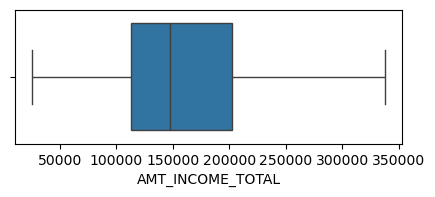

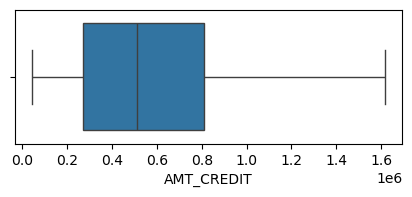

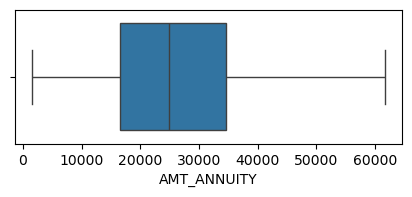

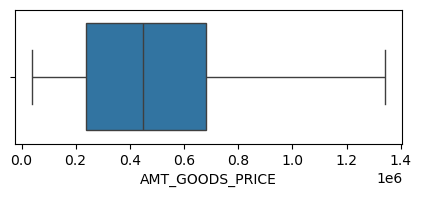

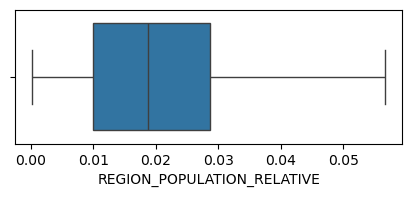

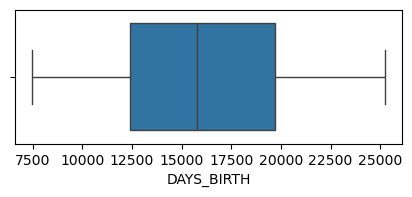

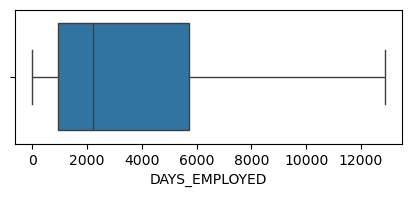

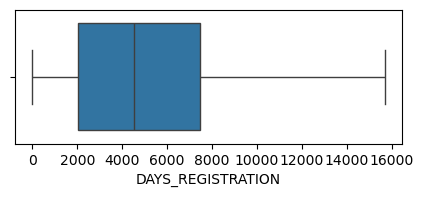

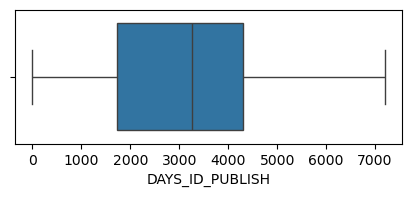

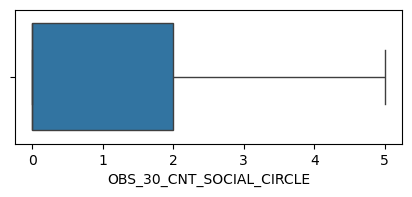

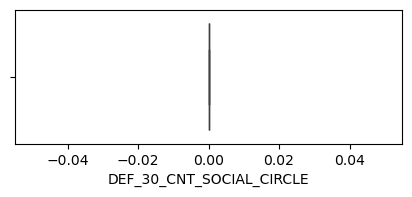

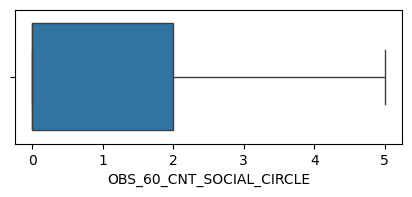

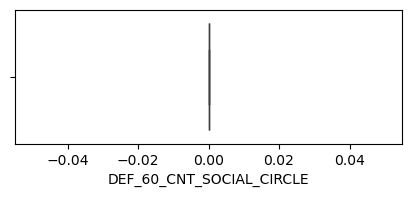

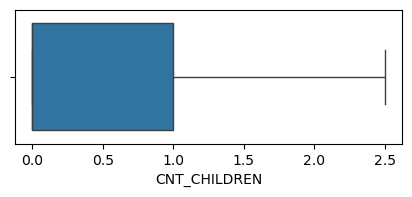

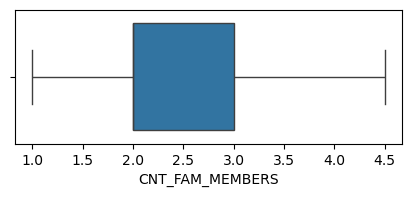

In [103]:
# Checking the days columns

for i, col in enumerate(updated_num_cols):
    plt.figure(figsize = [23,8])
    plt.subplot(4,4,i+1)
    sns.boxplot(data=app_data,x=col)

In [104]:
app_data.DEF_30_CNT_SOCIAL_CIRCLE.value_counts()

DEF_30_CNT_SOCIAL_CIRCLE
0.0    307507
Name: count, dtype: int64

In [105]:
app_data.DEF_60_CNT_SOCIAL_CIRCLE.value_counts()

DEF_60_CNT_SOCIAL_CIRCLE
0.0    307507
Name: count, dtype: int64

In [106]:
#After dealing with the missing values in this way, we can observe that the defaulters 30 and 60 days past due have come down to zero. This is due to the presence of widespread outliers. Hence now we can drop these two columns as they are of no use in the further analysis.

app_data.drop(['DEF_30_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE'], axis = 1, inplace = True)

In [107]:
app_data.shape

(307507, 30)

## Step 3 : Standardising values

In [108]:
updated_num_cols

['AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'CNT_CHILDREN',
 'CNT_FAM_MEMBERS']

In [109]:
days_col

['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH']

In [110]:
app_data[days_col].head()

DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH
0      9461.0          637.0             3648.0           2120.0
1     16765.0         1188.0             1186.0            291.0
2     19046.0          225.0             4260.0           2531.0
3     19005.0         3039.0             9833.0           2437.0
4     19932.0         3038.0             4311.0           3458.0

In [111]:
# A list days_col was created before. We can convert all the days into years by looping. 

for col in days_col:
    app_data[col]=round(app_data[col]/365)

In [112]:
app_data[days_col].head()

DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH
0        26.0            2.0               10.0              6.0
1        46.0            3.0                3.0              1.0
2        52.0            1.0               12.0              7.0
3        52.0            8.0               27.0              7.0
4        55.0            8.0               12.0              9.0

In [113]:
#Renaming the columns to years

app_data['YEARS_BIRTH'] = app_data['DAYS_BIRTH']
app_data['YEARS_EMPLOYED'] = app_data['DAYS_EMPLOYED']
app_data['YEARS_REGISTRATION'] = app_data['DAYS_REGISTRATION']
app_data['YEARS_ID_PUBLISH'] = app_data['DAYS_ID_PUBLISH']

#dropping days_cols
app_data.drop(days_col, axis =1, inplace = True)

## STEP 4 Imbalance Percentage

In [114]:
# calculating the imbalance percentage for the Target column

app_data.TARGET.value_counts(normalize=True)

TARGET
0    0.91927
1    0.08073
Name: proportion, dtype: float64

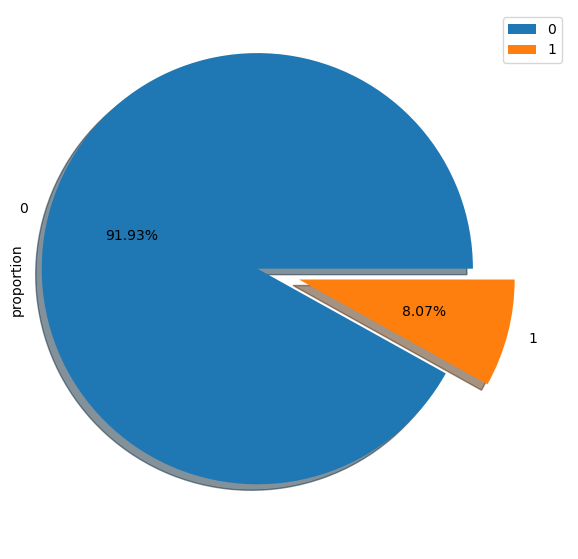

In [115]:
plt.figure(figsize=(8,7))
app_data.TARGET.value_counts(normalize=True).plot.pie(autopct='%.2f%%',explode=[0.2,0], shadow=True)
plt.legend()
plt.show()

This Pie plot on target variable indicates that out of the total data the number of defaulters are very less (8.07% of the total data) as compared the non defaulters (91.93% of the total data).

## Step 5: Univariate Analysis

In [116]:
updated_cat_cols

['TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'ORGANIZATION_TYPE',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY']

In [117]:
app_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER  FLAG_OWN_CAR  \
0      100002       1         Cash loans           M             0   
1      100003       0         Cash loans           F             0   
2      100004       0    Revolving loans           M             1   
3      100006       0         Cash loans           F             0   
4      100007       0         Cash loans           M             0   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                1           0.0          202500.0    406597.5      24700.5   
1                0           0.0          270000.0   1293502.5      35698.5   
2                1           0.0           67500.0    135000.0       6750.0   
3                1           0.0          135000.0    312682.5      29686.5   
4                1           0.0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0         351000.0          Working  Secondary / secondary special   
1        1129500.0    State servant               Higher education   
2         135000.0          Working  Secondary / secondary special   
3         297000.0          Working  Secondary / secondary special   
4         513000.0          Working  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
0  Single / not married  House / apartment                    0.018801   
1               Married  House / apartment                    0.003541   
2  Single / not married  House / apartment                    0.010032   
3        Civil marriage  House / apartment                    0.008019   
4  Single / not married  House / apartment                    0.028663   

  OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0        Laborers              1.0                     2   
1      Core staff              2.0                     1   
2        Laborers              1.0                     2   
3        Laborers              2.0                     2   
4      Core staff              1.0                     2   

   REGION_RATING_CLIENT_W_CITY  REG_CITY_NOT_LIVE_CITY  \
0                            2                       0   
1                            1                       0   
2                            2                       0   
3                            2                       0   
4                            2                       0   

   REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  \
0                       0                        0  Business Entity Type 3   
1                       0                        0                  School   
2                       0                        0              Government   
3                       0                        0  Business Entity Type 3   
4                       1                        1                Religion   

   OBS_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  YEARS_BIRTH  \
0                       2.0                       2.0         26.0   
1                       1.0                       1.0         46.0   
2                       0.0                       0.0         52.0   
3                       2.0                       2.0         52.0   
4                       0.0                       0.0         55.0   

   YEARS_EMPLOYED  YEARS_REGISTRATION  YEARS_ID_PUBLISH  
0             2.0                10.0               6.0  
1             3.0                 3.0               1.0  
2             1.0                12.0               7.0  
3             8.0                27.0               7.0  
4             8.0                12.0               9.0

In [118]:
app_data.NAME_CONTRACT_TYPE.value_counts()

NAME_CONTRACT_TYPE
Cash loans         278232
Revolving loans     29275
Name: count, dtype: int64

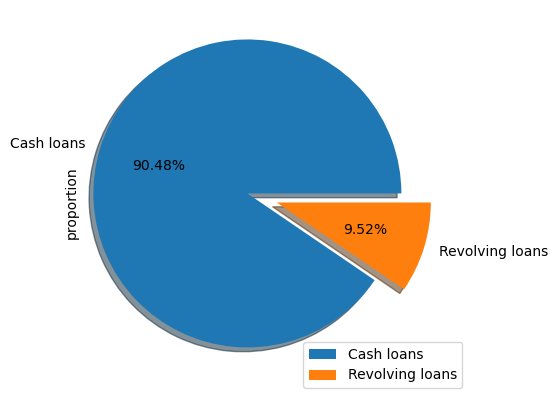

In [119]:
plt.figure(figsize = [10,5])
app_data.NAME_CONTRACT_TYPE.value_counts(normalize = True).plot.pie(autopct='%.2f%%',explode=[0.2,0], shadow=True)
plt.legend()
plt.show()

In [120]:
#Gender Column

app_data.CODE_GENDER.value_counts()

CODE_GENDER
F    202448
M    105059
Name: count, dtype: int64

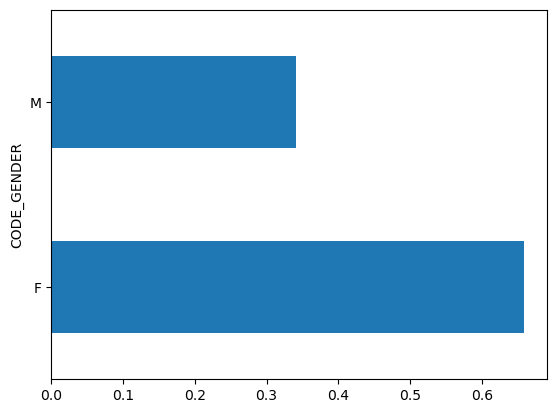

In [121]:
app_data.CODE_GENDER.value_counts(normalize = True).plot.barh()
plt.show()

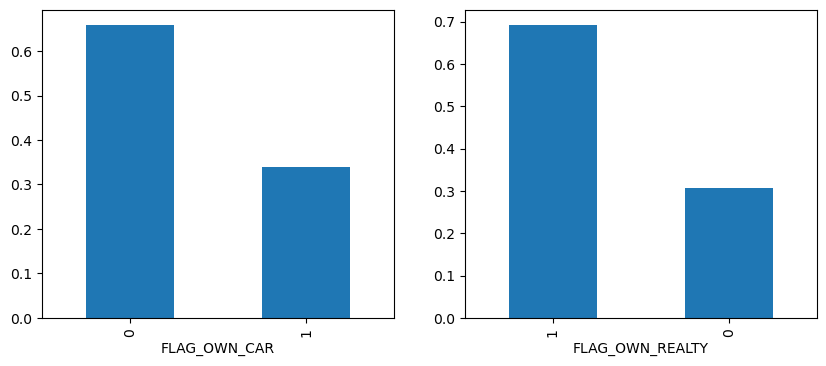

In [122]:
# Having a view together of the customers who own cars and those who own properties

plt.figure(figsize=[10,4])
plt.subplot(1, 2, 1)
app_data.FLAG_OWN_CAR.value_counts(normalize = True).plot.bar()
plt.subplot(1, 2, 2)
app_data.FLAG_OWN_REALTY.value_counts(normalize = True).plot.bar()
plt.show()

In [123]:
app_data.NAME_INCOME_TYPE.value_counts()

NAME_INCOME_TYPE
Working                 158771
Commercial associate     71616
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: count, dtype: int64

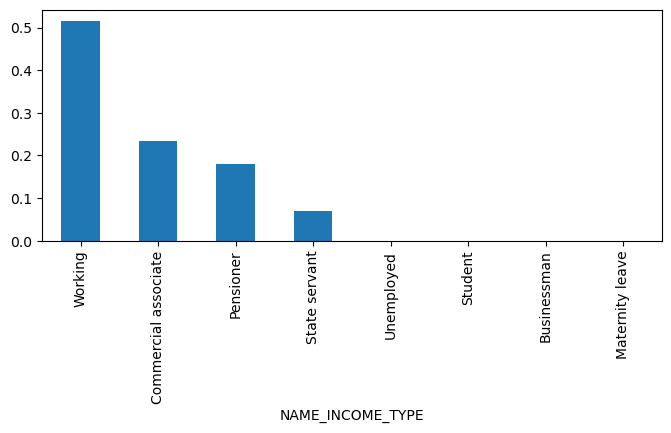

In [124]:
plt.figure(figsize=[8,3])
app_data.NAME_INCOME_TYPE.value_counts(normalize = True).plot.bar()
plt.show()

In [125]:
app_data.NAME_EDUCATION_TYPE.value_counts()

NAME_EDUCATION_TYPE
Secondary / secondary special    218389
Higher education                  74862
Incomplete higher                 10276
Lower secondary                    3816
Academic degree                     164
Name: count, dtype: int64

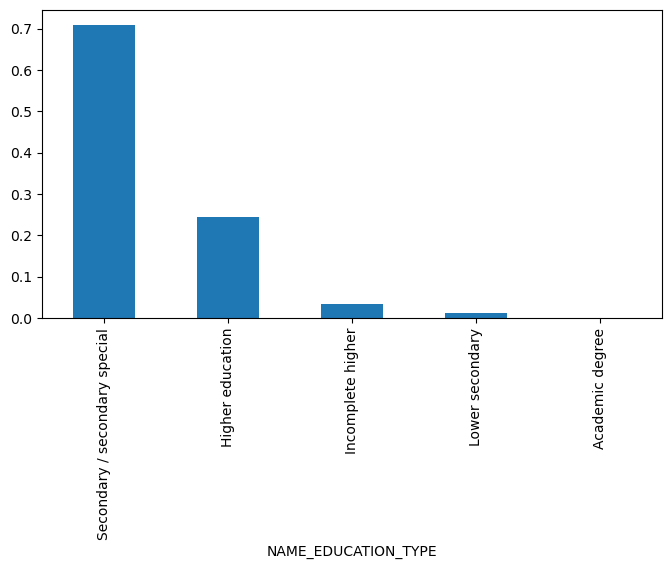

In [126]:
plt.figure(figsize=[8,4])
app_data.NAME_EDUCATION_TYPE.value_counts(normalize = True).plot.bar()
plt.show()

In [127]:
app_data.NAME_FAMILY_STATUS.value_counts()

NAME_FAMILY_STATUS
Married                 196429
Single / not married     45444
Civil marriage           29774
Separated                19770
Widow                    16088
Unknown                      2
Name: count, dtype: int64

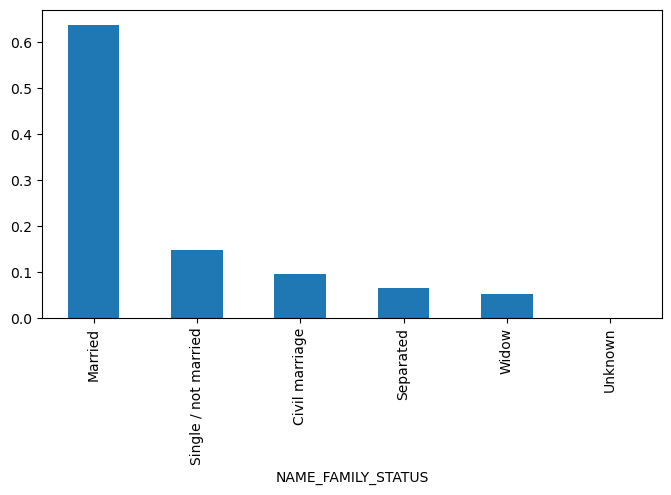

In [128]:
plt.figure(figsize=[8,4])
app_data.NAME_FAMILY_STATUS.value_counts(normalize = True).plot.bar()
plt.show()

In [129]:
app_data.NAME_HOUSING_TYPE.value_counts()

NAME_HOUSING_TYPE
House / apartment      272865
With parents            14840
Municipal apartment     11182
Rented apartment         4881
Office apartment         2617
Co-op apartment          1122
Name: count, dtype: int64

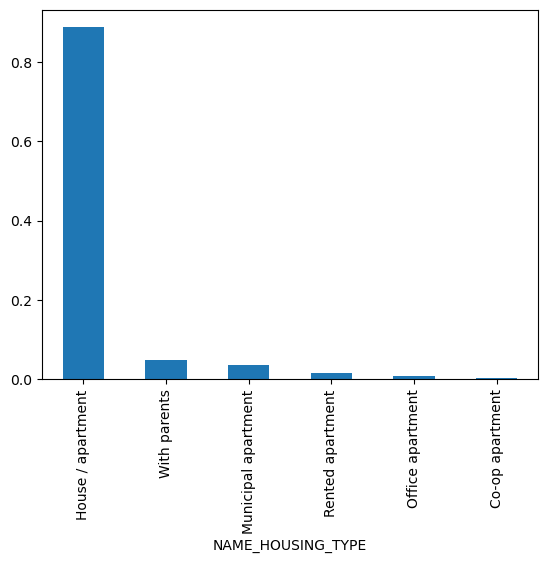

In [130]:
app_data.NAME_HOUSING_TYPE.value_counts(normalize = True).plot.bar()
plt.show()

In [131]:
app_data.OCCUPATION_TYPE.value_counts()

OCCUPATION_TYPE
Unknown                  96389
Laborers                 55186
Sales staff              32102
Core staff               27569
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2092
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: count, dtype: int64

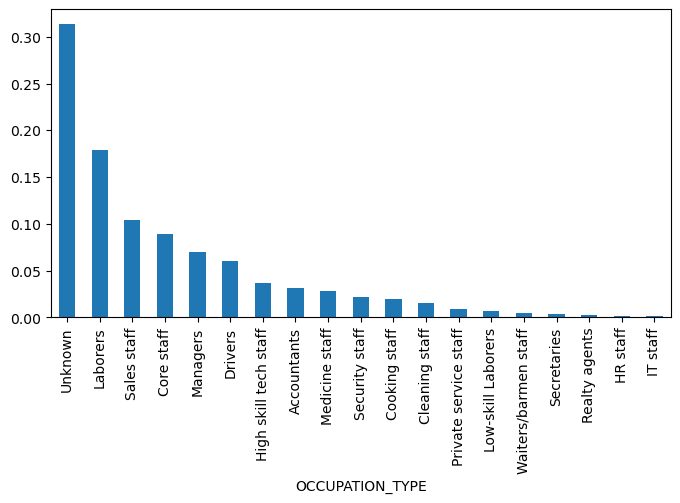

In [132]:
plt.figure(figsize=[8,4])
app_data.OCCUPATION_TYPE.value_counts(normalize = True).plot.bar()
plt.show()

In [133]:
app_data.ORGANIZATION_TYPE.value_counts()

ORGANIZATION_TYPE
Business Entity Type 3    67992
Unknown                   55374
Self-employed             38412
Other                     16683
Medicine                  11192
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6879
Construction               6721
Business Entity Type 1     5983
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3277
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7      

In [134]:
#since there are so many types in each sectors, we can group them together and name that sector

app_data.ORGANIZATION_TYPE.replace(['Business Entity Type 3', 'Business Entity Type 2', 'Business Entity Type 1'], 'Business Entity', inplace = True)
app_data.ORGANIZATION_TYPE.replace(['Trade: type 7','Trade: type 6' ,'Trade: type 5', 'Trade: type 4', 'Trade: type 3', 'Trade: type 2', 'Trade: type 1'], 'Trade', inplace = True)
app_data.ORGANIZATION_TYPE.replace(['Transport: type 1','Transport: type 2','Transport: type 3','Transport: type 4'], 'Transport', inplace = True)
app_data.ORGANIZATION_TYPE.replace(['Industry: type 1','Industry: type 2','Industry: type 3','Industry: type 4','Industry: type 5','Industry: type 6','Industry: type 7','Industry: type 8','Industry: type 9','Industry: type 10','Industry: type 11','Industry: type 12','Industry: type 13'], 'Industry', inplace = True)


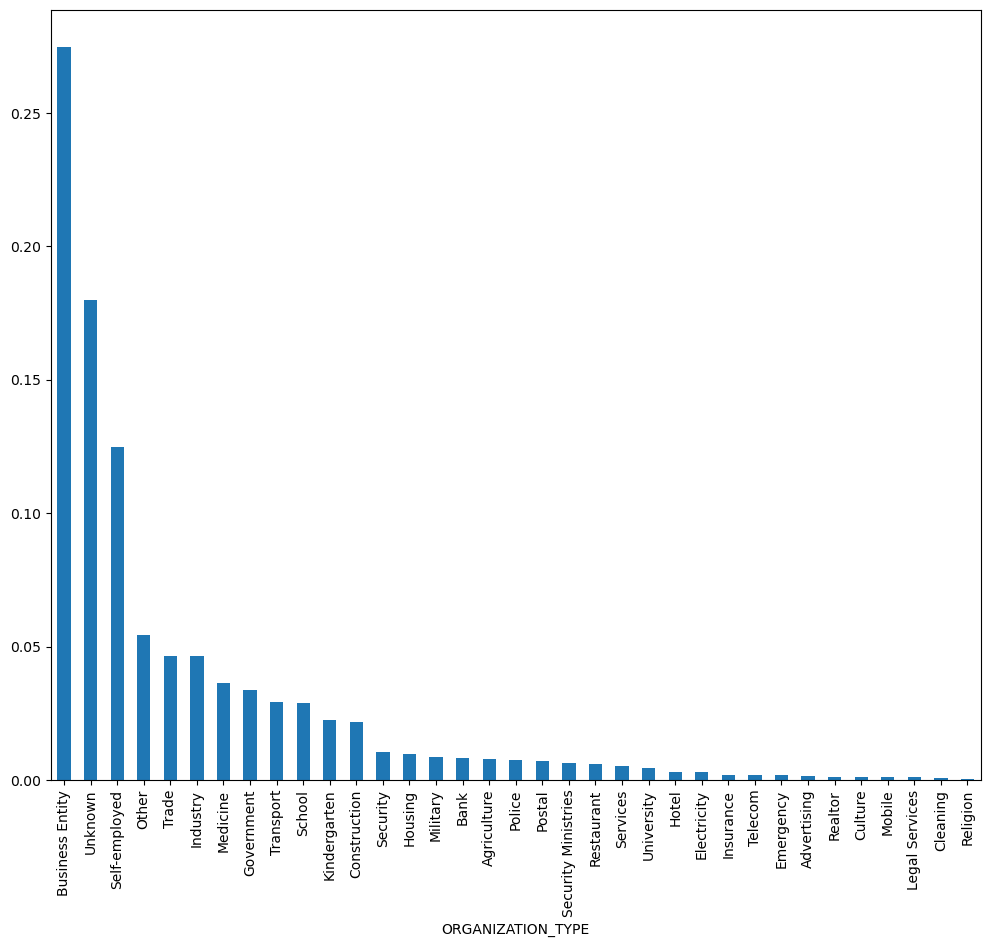

In [135]:
plt.figure(figsize=[12,10])
app_data.ORGANIZATION_TYPE.value_counts(normalize = True).plot.bar()
plt.show()

In [136]:
app_data.REGION_RATING_CLIENT.value_counts()

REGION_RATING_CLIENT
2    226981
3     48329
1     32197
Name: count, dtype: int64

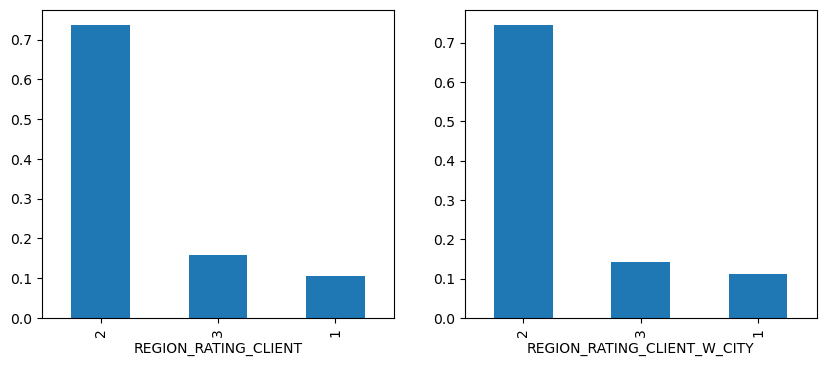

In [137]:
plt.figure(figsize=[10,4])
plt.subplot(1, 2, 1)
app_data.REGION_RATING_CLIENT.value_counts(normalize = True).plot.bar()
plt.subplot(1, 2, 2)
app_data.REGION_RATING_CLIENT_W_CITY.value_counts(normalize = True).plot.bar()
plt.show()

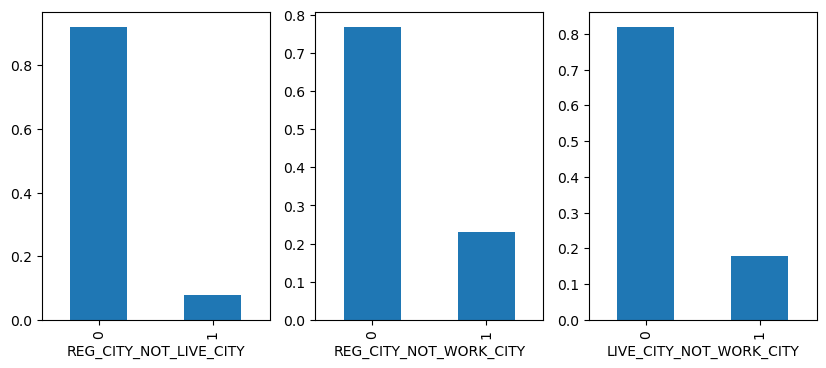

In [138]:
plt.figure(figsize=[10,4])
plt.subplot(1, 3, 1)
app_data['REG_CITY_NOT_LIVE_CITY'].value_counts(normalize= True).plot.bar()
plt.subplot(1, 3, 2)
app_data['REG_CITY_NOT_WORK_CITY'].value_counts(normalize= True).plot.bar()
plt.subplot(1, 3, 3)
app_data['LIVE_CITY_NOT_WORK_CITY'].value_counts(normalize= True).plot.bar()
plt.show()

##### Inferences of categorical Univariate Analysis

1. Cash type of loans are 90.48% in proportion whereas revolving loans are of 9.52%
2. Females who have opted for the loan are almost double than males.
3. Customers with Secondar/secondary special education qualification are the majority customers taking loans.
4. A large number of customers who took loan own car whereas only a few customers own property like flats or house. 
5. From the plot we can say that the customers who are unemployed, student, Businessman and maternity leave are very less who have taken the loan. Therefore, those who are working majorly take loans. 
6. Customers who have opted for loans are majorly married. Hence banks can focus on married people.
7. There is a major amount of missing data in the occupation type column. Occupation is one of the most important deciding factors for the financial institutions on basis of which the loans are given. When such information is missing on alarge scale, the banks should make sure that they get this info going forward to have a better analysis. Among the other occupations, labourers are the highest.
8. In the Organization type, business entity has the highest number of people opting for loans.
9. Tier 2 region where client lives has the highest rating, region wise as well as citywise after which comes tier 3 and then teir 1.


In [139]:
updated_num_cols

['AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'CNT_CHILDREN',
 'CNT_FAM_MEMBERS']

In [140]:
app_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER  FLAG_OWN_CAR  \
0      100002       1         Cash loans           M             0   
1      100003       0         Cash loans           F             0   
2      100004       0    Revolving loans           M             1   
3      100006       0         Cash loans           F             0   
4      100007       0         Cash loans           M             0   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                1           0.0          202500.0    406597.5      24700.5   
1                0           0.0          270000.0   1293502.5      35698.5   
2                1           0.0           67500.0    135000.0       6750.0   
3                1           0.0          135000.0    312682.5      29686.5   
4                1           0.0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0         351000.0          Working  Secondary / secondary special   
1        1129500.0    State servant               Higher education   
2         135000.0          Working  Secondary / secondary special   
3         297000.0          Working  Secondary / secondary special   
4         513000.0          Working  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
0  Single / not married  House / apartment                    0.018801   
1               Married  House / apartment                    0.003541   
2  Single / not married  House / apartment                    0.010032   
3        Civil marriage  House / apartment                    0.008019   
4  Single / not married  House / apartment                    0.028663   

  OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0        Laborers              1.0                     2   
1      Core staff              2.0                     1   
2        Laborers              1.0                     2   
3        Laborers              2.0                     2   
4      Core staff              1.0                     2   

   REGION_RATING_CLIENT_W_CITY  REG_CITY_NOT_LIVE_CITY  \
0                            2                       0   
1                            1                       0   
2                            2                       0   
3                            2                       0   
4                            2                       0   

   REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY ORGANIZATION_TYPE  \
0                       0                        0   Business Entity   
1                       0                        0            School   
2                       0                        0        Government   
3                       0                        0   Business Entity   
4                       1                        1          Religion   

   OBS_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  YEARS_BIRTH  \
0                       2.0                       2.0         26.0   
1                       1.0                       1.0         46.0   
2                       0.0                       0.0         52.0   
3                       2.0                       2.0         52.0   
4                       0.0                       0.0         55.0   

   YEARS_EMPLOYED  YEARS_REGISTRATION  YEARS_ID_PUBLISH  
0             2.0                10.0               6.0  
1             3.0                 3.0               1.0  
2             1.0                12.0               7.0  
3             8.0                27.0               7.0  
4             8.0                12.0               9.0

In [141]:
app_data.YEARS_BIRTH.describe()

count    307507.000000
mean         43.938736
std          11.964030
min          21.000000
25%          34.000000
50%          43.000000
75%          54.000000
max          69.000000
Name: YEARS_BIRTH, dtype: float64

In [142]:
app_data.YEARS_BIRTH=pd.cut(app_data.YEARS_BIRTH,bins=[20,30,40,50,60,70],labels=['<30','30-40','40-50','50-60','>60'])

In [143]:
app_data.YEARS_BIRTH.value_counts()

YEARS_BIRTH
30-40    82769
40-50    75509
50-60    67954
<30      48867
>60      32408
Name: count, dtype: int64

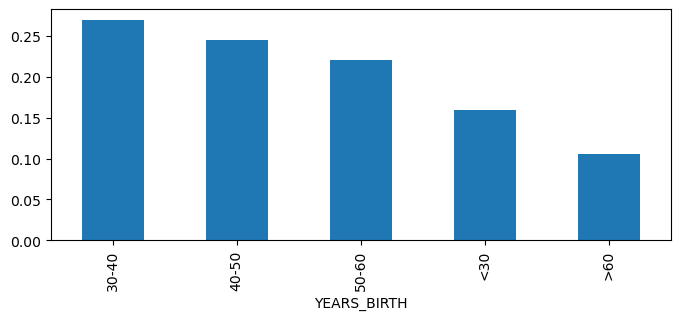

In [144]:
plt.figure(figsize = [8,3])
app_data.YEARS_BIRTH.value_counts(normalize = True).plot.bar()
plt.show()

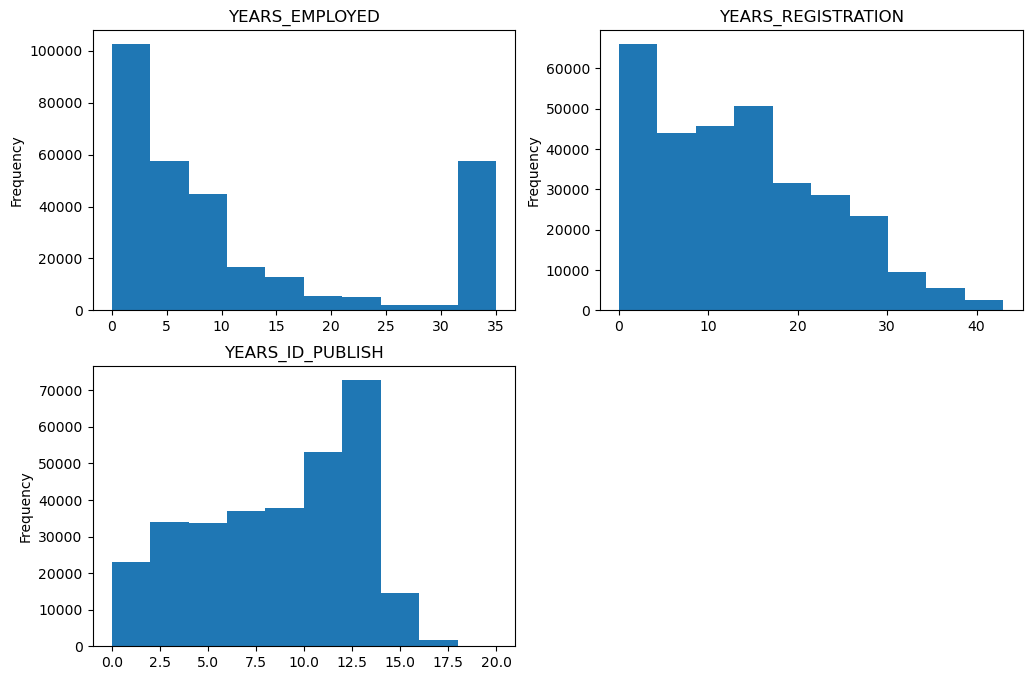

In [145]:
# We can proceed with the other 3 years columns(YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH) 
#similar to the above age column by binning orelse we can go with the histogram plot to have an overview of those columns. 

plt.figure(figsize=[12,8])
plt.subplot(2, 2, 1)
app_data['YEARS_EMPLOYED'].plot.hist()
plt.title('YEARS_EMPLOYED')
plt.subplot(2, 2, 2)
app_data['YEARS_REGISTRATION'].plot.hist()
plt.title('YEARS_REGISTRATION')
plt.subplot(2, 2, 3)
app_data['YEARS_ID_PUBLISH'].plot.hist()
plt.title('YEARS_ID_PUBLISH')
plt.show()

In [146]:
# creating bins for AMT_INCOME_TOTAL column

app_data['INCOME_CATEGORY']=pd.cut(app_data.AMT_INCOME_TOTAL, bins=5, labels=['Very Low','Low','Medium','High','Very High'])

In [147]:
app_data['INCOME_CATEGORY'].value_counts()

INCOME_CATEGORY
Low          119922
Medium        82454
High          42715
Very Low      35371
Very High     27045
Name: count, dtype: int64

<Axes: ylabel='INCOME_CATEGORY'>

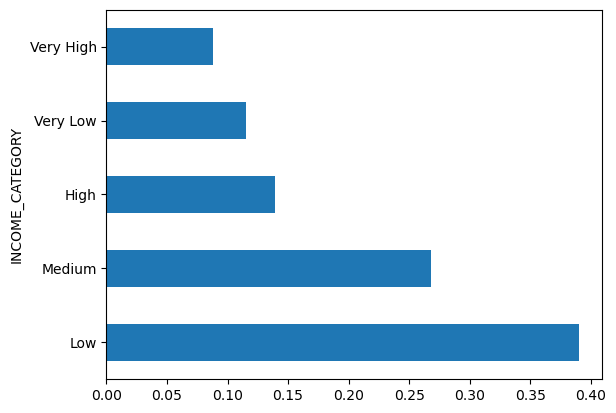

In [148]:
app_data['INCOME_CATEGORY'].value_counts(normalize = True).plot.barh()

In [149]:
# creating bins for AMT_CREDIT column

app_data['CREDIT_CATEGORY']=pd.cut(app_data.AMT_CREDIT,bins=5,labels=['Very Low','Low','Medium','High','Very High'])

In [150]:
app_data['CREDIT_CATEGORY'].value_counts()

CREDIT_CATEGORY
Very Low     108752
Low           86097
Medium        61852
High          31749
Very High     19057
Name: count, dtype: int64

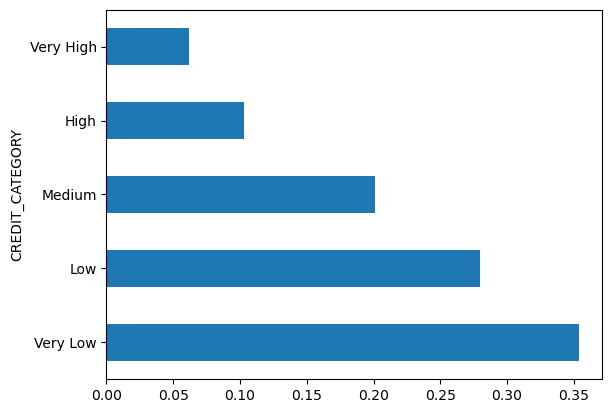

In [151]:
app_data['CREDIT_CATEGORY'].value_counts(normalize = True).plot.barh()
plt.show()

In [152]:
app_data.AMT_ANNUITY.describe()

count    307507.000000
mean      26797.745980
std       13281.337932
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max       61704.000000
Name: AMT_ANNUITY, dtype: float64

In [153]:
# creating bins for AMT_ANNUITY column

app_data['ANNUITY_CATEGORY']=pd.cut(app_data.AMT_ANNUITY,bins=5,labels=['Very Low','Low','Medium','High','Very High'])

In [154]:
app_data['GOODS_PRICE_CATEGORY']=pd.cut(app_data.AMT_GOODS_PRICE,bins=5,labels=['Very Low','Low','Medium','High','Very High'])

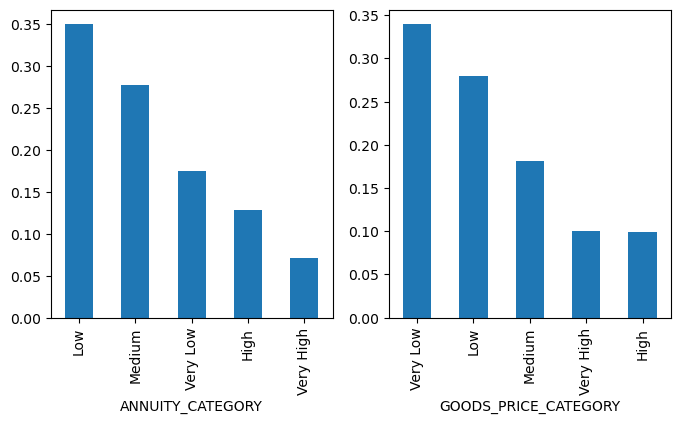

In [155]:
#Plotting the loan annuity and price of the goods for which the loan is given(AMT_GOODS_PRICE) together

plt.figure(figsize=[8,4])
plt.subplot(1, 2, 1)
app_data['ANNUITY_CATEGORY'].value_counts(normalize = True).plot.bar()
plt.subplot(1, 2, 2)
app_data['GOODS_PRICE_CATEGORY'].value_counts(normalize = True).plot.bar()
plt.show()

In [156]:
app_data.CNT_CHILDREN.value_counts()

CNT_CHILDREN
0.0    215369
1.0     61118
2.0     26748
2.5      4272
Name: count, dtype: int64

In [157]:
#Rounding the count of children since it has to be a positive integer and not in decimals

app_data.CNT_CHILDREN = round(app_data.CNT_CHILDREN)

In [158]:
app_data.CNT_CHILDREN.value_counts()

CNT_CHILDREN
0.0    215369
1.0     61118
2.0     31020
Name: count, dtype: int64

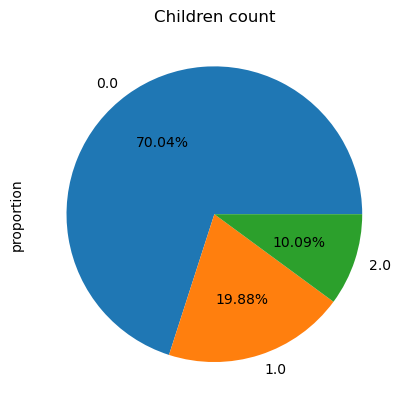

In [159]:
app_data.CNT_CHILDREN.value_counts(normalize = True).plot.pie(autopct='%.2f%%')
plt.title('Children count')
plt.show()

In [160]:
app_data.CNT_FAM_MEMBERS = round(app_data.CNT_FAM_MEMBERS)

In [161]:
app_data.CNT_FAM_MEMBERS.value_counts()

CNT_FAM_MEMBERS
2.0    158357
1.0     67847
3.0     52600
4.0     28703
Name: count, dtype: int64

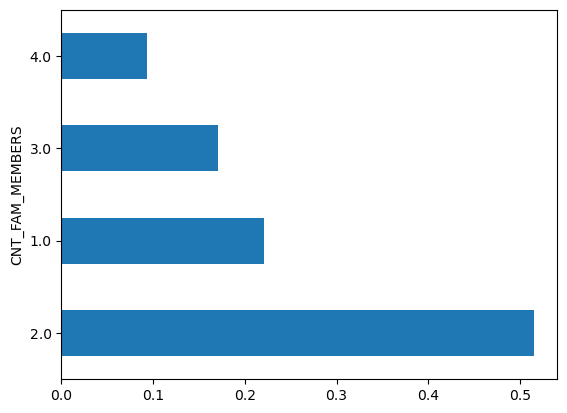

In [162]:
app_data.CNT_FAM_MEMBERS.value_counts(normalize = True).plot.barh()
plt.show()

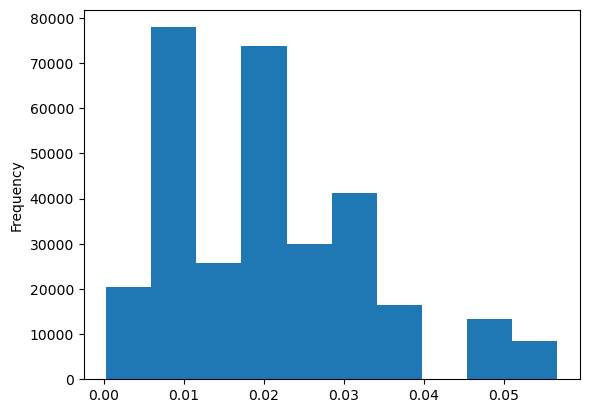

In [163]:
app_data.REGION_POPULATION_RELATIVE.plot.hist()
plt.show()

##### Inferences of numerical Univariate Analysis

1. Middle aged people between 30 to 40 age who are looking for loans are highest and the senior citizens are lowest. 
2. Majority of the clients opt for the loans within 5 years after starting the current employement and the next majority lies in the most experienced clients i.e., those employees who have been working for the same organization for several years around 30 to 35 years.
3. People with low income are the ones who approach bank and financial institutions for loans and those who have very low income are comparatively approaching very less. It could be because of the incapacity of those people to repay the loan orelse the lack of awareness like in villages or underdeveloped places where the individuals prefer to take loan amounts from the money lenders than banks. On the other hand people with very high income also do not approach banks for loans.
4. Small loan amount amounts are being taken alot by the customers compared to higher amounts. We can see a negative linear relationship here. As the credit amount increases the number of people taking such loans decreases.
5. For consumer loans, majority is of the very low price goods after which comes low and medium price goods. Very and high amount loans are almost same in number which is different from the credit amount category.
6. 70% of the clients do not have any children and the remaing 20% have 1 child and 10% have 2 children.
7. Around 50% of clients have 2 members in their family

## Step 6: Sub Univariate Analysis and Bivariate Analysis

#### Bivariate Analysis
- Bi: Two, variate: variable means analysing 2 variables at a time
- purpose: To check the relationship between two variables

In [164]:
app_data.head(2)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER  FLAG_OWN_CAR  \
0      100002       1         Cash loans           M             0   
1      100003       0         Cash loans           F             0   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                1           0.0          202500.0    406597.5      24700.5   
1                0           0.0          270000.0   1293502.5      35698.5   

   AMT_GOODS_PRICE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0         351000.0          Working  Secondary / secondary special   
1        1129500.0    State servant               Higher education   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
0  Single / not married  House / apartment                    0.018801   
1               Married  House / apartment                    0.003541   

  OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0        Laborers              1.0                     2   
1      Core staff              2.0                     1   

   REGION_RATING_CLIENT_W_CITY  REG_CITY_NOT_LIVE_CITY  \
0                            2                       0   
1                            1                       0   

   REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY ORGANIZATION_TYPE  \
0                       0                        0   Business Entity   
1                       0                        0            School   

   OBS_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE YEARS_BIRTH  \
0                       2.0                       2.0         <30   
1                       1.0                       1.0       40-50   

   YEARS_EMPLOYED  YEARS_REGISTRATION  YEARS_ID_PUBLISH INCOME_CATEGORY  \
0             2.0                10.0               6.0          Medium   
1             3.0                 3.0               1.0            High   

  CREDIT_CATEGORY ANNUITY_CATEGORY GOODS_PRICE_CATEGORY  
0             Low              Low                  Low  
1            High           Medium            Very High

In [165]:
#Defaulters percentage in the data
app_data.TARGET.mean()   

0.08072986956394489

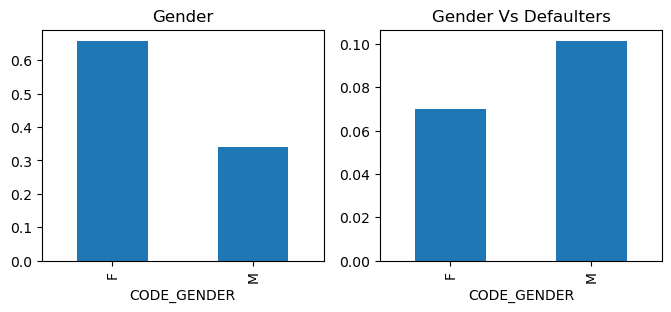

In [166]:
# TARGET vs CODE_GENDER

plt.figure(figsize=(8,3))
plt.subplot(1,2,1)
app_data.CODE_GENDER.value_counts(normalize = True).plot.bar()
plt.title('Gender')
plt.subplot(1,2,2)
app_data.groupby(['CODE_GENDER'])['TARGET'].mean().plot.bar()
plt.title('Gender Vs Defaulters')
plt.show()


The above plots show that although females are more in number which is approximately double than males, we can see that Males have more tendency to default a loan than females.

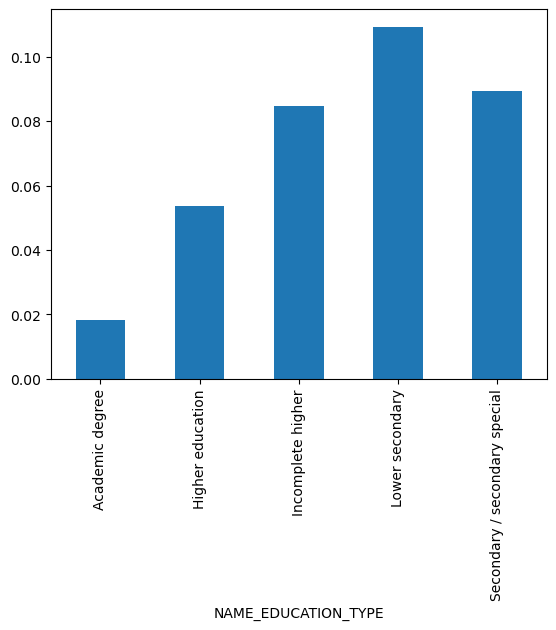

In [167]:
# EDUCATION TYPE

app_data.groupby(['NAME_EDUCATION_TYPE'])['TARGET'].mean().plot.bar()
plt.show()

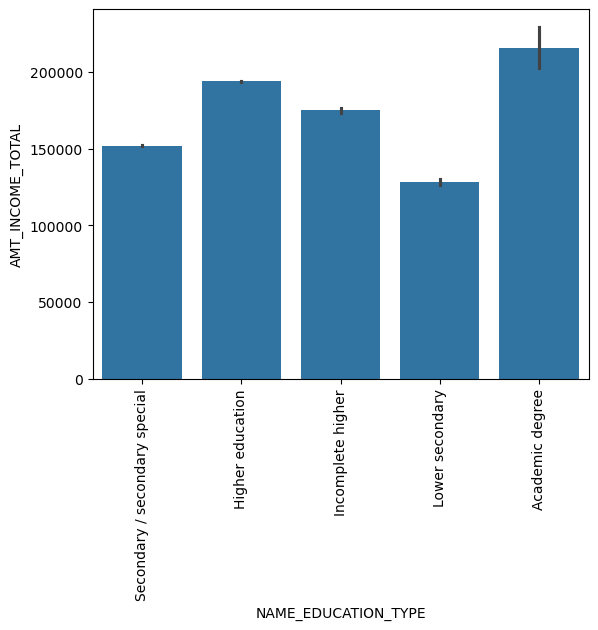

In [168]:
sns.barplot(data = app_data, x= 'NAME_EDUCATION_TYPE', y = 'AMT_INCOME_TOTAL')
plt.xticks(rotation=90)
plt.show()

It has been observed that the maximum defaulters are in education category of Lower Secondary and least defaulters are those who have an academic degree. From another plot of education Vs income we can conclude that people who have education till secondary level earn less or have low source of income and are not able to pay the loans on time and those who earn more i.e., academic degree holders are the ones earning more and are less likely to default.

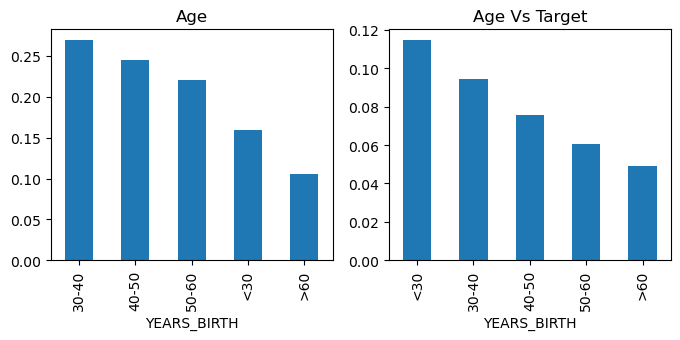

In [169]:
#Target vs AGE

plt.figure(figsize=(8,3))
plt.subplot(1,2,1)
app_data.YEARS_BIRTH.value_counts(normalize = True).plot.bar()
plt.title('Age')
plt.subplot(1,2,2)
app_data.groupby(['YEARS_BIRTH'])['TARGET'].mean().plot.bar()
plt.title('Age Vs Target')
plt.show()

We can say that the clients whose age is less than 30 are less in number after the senior citizens. However they are the ones with highest default rates. While the senior citizens whose age is greater than 60 are less in number and at the same time they have least default rates. Hence, banks should focus more on the senior citizens and be more careful with the young clients whose age is less than 30. Here, there is a linear relationship between the age and the default rate. As the age increases the defaulters reduce.

In [170]:

app_data.head(2)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER  FLAG_OWN_CAR  \
0      100002       1         Cash loans           M             0   
1      100003       0         Cash loans           F             0   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                1           0.0          202500.0    406597.5      24700.5   
1                0           0.0          270000.0   1293502.5      35698.5   

   AMT_GOODS_PRICE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0         351000.0          Working  Secondary / secondary special   
1        1129500.0    State servant               Higher education   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
0  Single / not married  House / apartment                    0.018801   
1               Married  House / apartment                    0.003541   

  OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0        Laborers              1.0                     2   
1      Core staff              2.0                     1   

   REGION_RATING_CLIENT_W_CITY  REG_CITY_NOT_LIVE_CITY  \
0                            2                       0   
1                            1                       0   

   REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY ORGANIZATION_TYPE  \
0                       0                        0   Business Entity   
1                       0                        0            School   

   OBS_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE YEARS_BIRTH  \
0                       2.0                       2.0         <30   
1                       1.0                       1.0       40-50   

   YEARS_EMPLOYED  YEARS_REGISTRATION  YEARS_ID_PUBLISH INCOME_CATEGORY  \
0             2.0                10.0               6.0          Medium   
1             3.0                 3.0               1.0            High   

  CREDIT_CATEGORY ANNUITY_CATEGORY GOODS_PRICE_CATEGORY  
0             Low              Low                  Low  
1            High           Medium            Very High

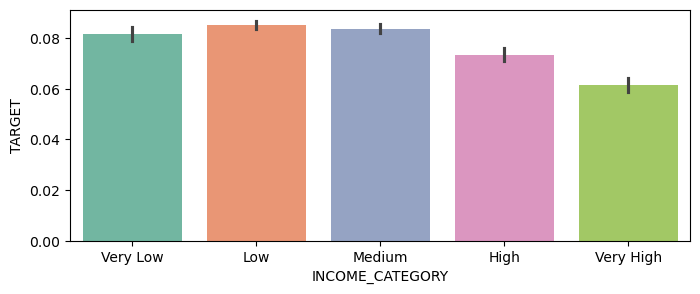

In [171]:
# Target Vs Income category

plt.figure(figsize =[8,3])
sns.barplot(data = app_data, x = 'INCOME_CATEGORY', y = 'TARGET', palette = 'Set2')
plt.show()

The plot indicates that the people with low income are the ones who are defaulters. This when compared with a real life scenario, the people with low salary are the ones in need of loan and mostly they are not able to payback the same.These low income group people are followed by medium, very low, highand very high income categories.

In general it is all the payback capacity of a person that makes a defaulter or a non defaulter. A person who has low income is in need of loan, takes credit and may not be able to pay back on time, so that person becomes a defaulter. But at the same time a low earning person may need a loan and can also pay the loan on time as well, so he is a non defaulter.

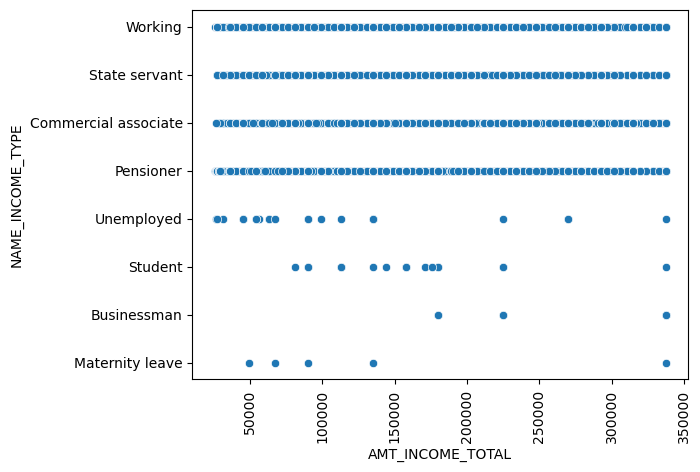

In [172]:
sns.scatterplot(data = app_data, x= 'AMT_INCOME_TOTAL', y = 'NAME_INCOME_TYPE')
plt.xticks(rotation=90)
plt.show()

In [173]:
app_data['NAME_INCOME_TYPE'].value_counts(normalize = True)

NAME_INCOME_TYPE
Working                 0.516317
Commercial associate    0.232892
Pensioner               0.180035
State servant           0.070577
Unemployed              0.000072
Student                 0.000059
Businessman             0.000033
Maternity leave         0.000016
Name: proportion, dtype: float64

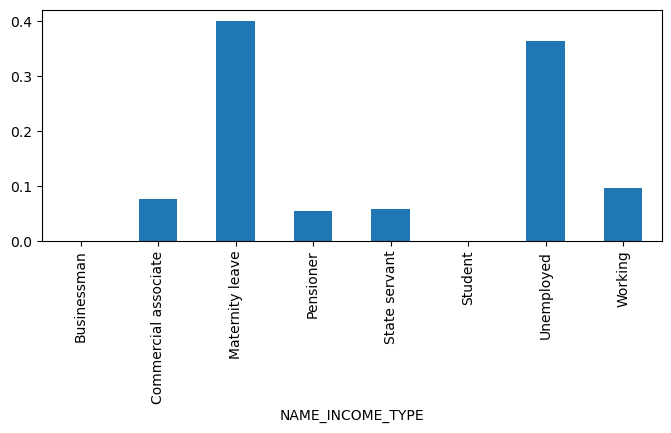

In [174]:
#Target vs Income Type

plt.figure(figsize =[8,3])
app_data.groupby(['NAME_INCOME_TYPE'])['TARGET'].mean().plot.bar()
plt.show()

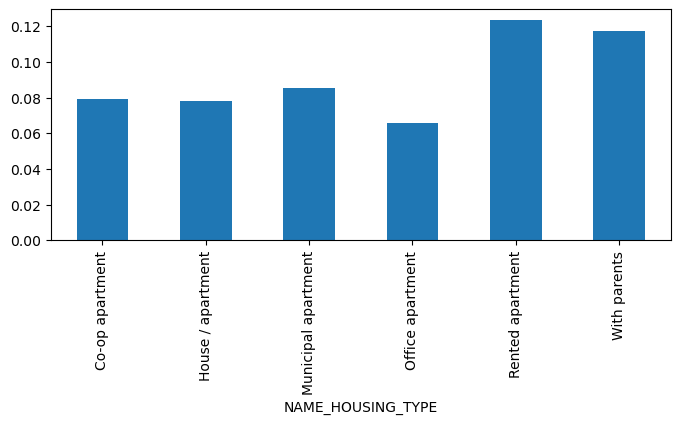

In [175]:
#Target vs NAME_HOUSING_TYPE

plt.figure(figsize =[8,3])
app_data.groupby(['NAME_HOUSING_TYPE'])['TARGET'].mean().plot.bar()
plt.show()

The data indicates that maximum people who are defaulters stay rented house/appratments followed by those who live with their parents have higher chances of defaulting.

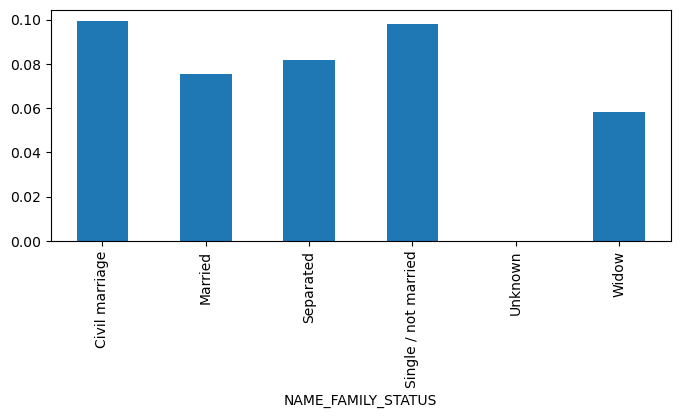

In [176]:
#Target vs Family Status

plt.figure(figsize =[8,3])
app_data.groupby(['NAME_FAMILY_STATUS'])['TARGET'].mean().plot.bar()
plt.show()

The graph indicates that most of the defaulters fall in the category of civil marriage and Single/unmarried, followed by separated, married and then widows.

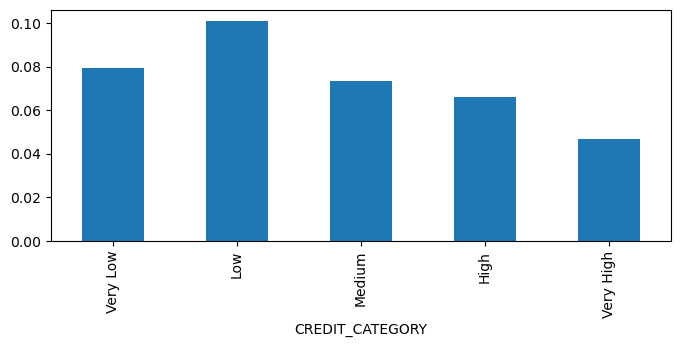

In [177]:
#Target vs CREDIT CATEGORY 

plt.figure(figsize =[8,3])
app_data.groupby(['CREDIT_CATEGORY'])['TARGET'].mean().plot.bar()
plt.show()

The graph clearly indicates that the people who have low credit amount are more in number in defaulters followed by very low credit catagory.

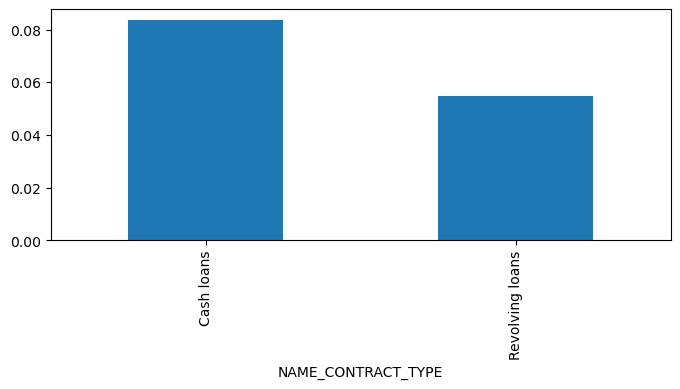

In [178]:
#Target vs NAME_CONTRACT_TYPE


plt.figure(figsize =[8,3])
app_data.groupby(['NAME_CONTRACT_TYPE'])['TARGET'].mean().plot.bar()
plt.show()

The graph says that cash loans are given to the people who are highly defaulters in comparison to revolving loans. 

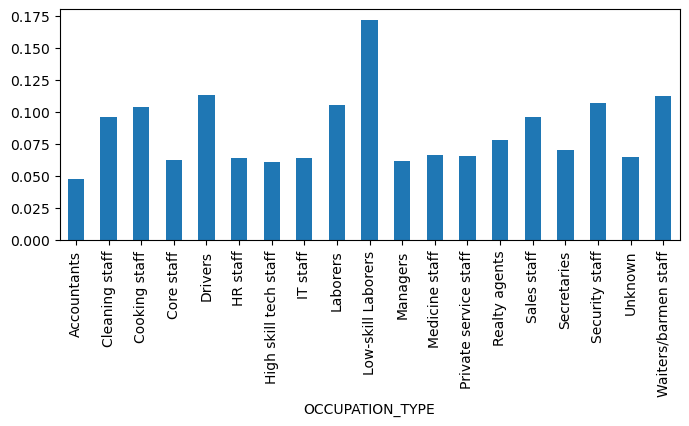

In [179]:
# TARGET vs OCCUPATION TYPE

plt.figure(figsize =[8,3])
app_data.groupby(['OCCUPATION_TYPE'])['TARGET'].mean().plot.bar()
plt.show()

Low Skilled labors, Drivers, waiters/barmen staff, labors and other low skilled jobs customers are more in number of those who default loans. And the least number of defaulters are accountants who are well educated. 

### Sub Univariate Analysis

In [180]:
# Divide the data set into 2 subsets one for Target value=1(defaulters) and other for target value=0(non defaulters)

app_data.head()
app_data_1=app_data[app_data.TARGET==1]  # subset dataframe for defaulters
app_data_0=app_data[app_data.TARGET==0]  # subset dataframe for non defaulters

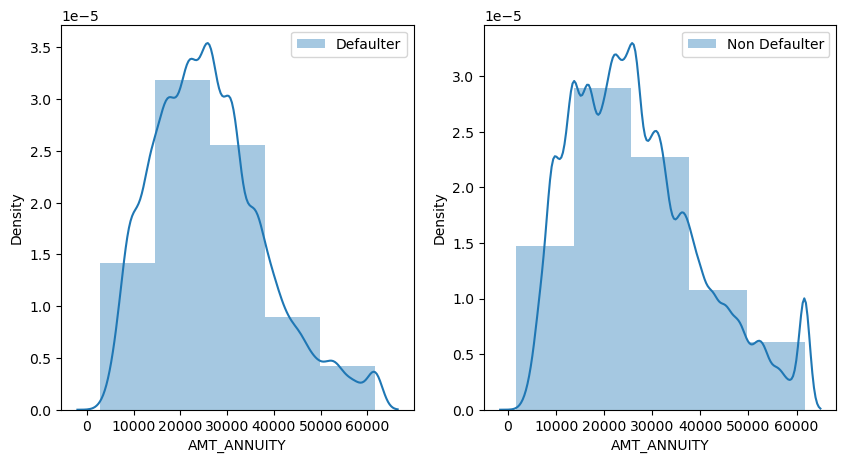

In [181]:
# AMT_ANNUITY
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.distplot(app_data_1.AMT_ANNUITY,label='Defaulter',bins=5)
plt.legend()
plt.subplot(1,2,2)
sns.distplot(app_data_0.AMT_ANNUITY,label='Non Defaulter',bins=5)
plt.legend()
plt.show()

The graph of annuity indicates that the spread of annuity is more between 15000 to 25000 and it gradually decreases over increase in annuity value. So, the people having annuity value between 15000 and 25000 are the ones who have defaulted the loan payment.
On the other hand in case of non defaulters there is a peak in density between annuity values of 15000 to 28000 and people in this annuity range are non defaulters.

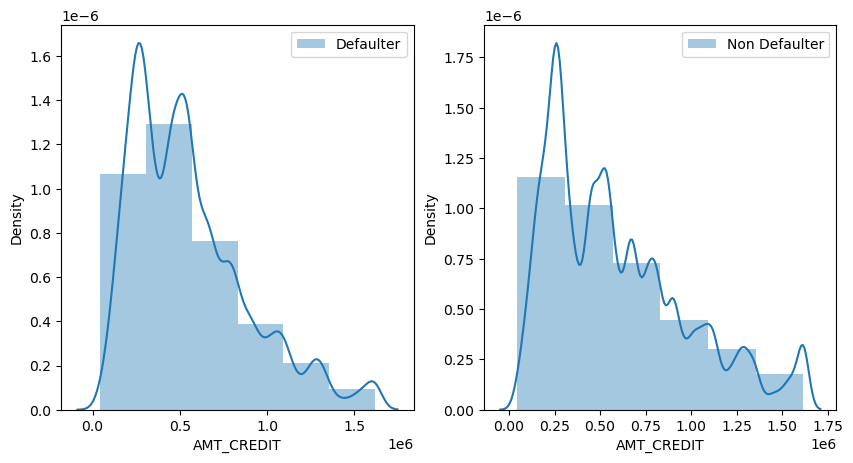

In [182]:
#AMT_CREDIT
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.distplot(app_data_1.AMT_CREDIT,label='Defaulter',bins=6)
plt.legend()
plt.subplot(1,2,2)
sns.distplot(app_data_0.AMT_CREDIT,label='Non Defaulter',bins=6)
plt.legend()
plt.show()

Under defaulters the credit values have peaks at 250000 and 500000. In non defaulters the credit values have peaks at 250000 then at 500000 and still peaks keep on having their rise and falls with peaks at 750000,1250000 and so on but the density keeps on decreasing post 500000.

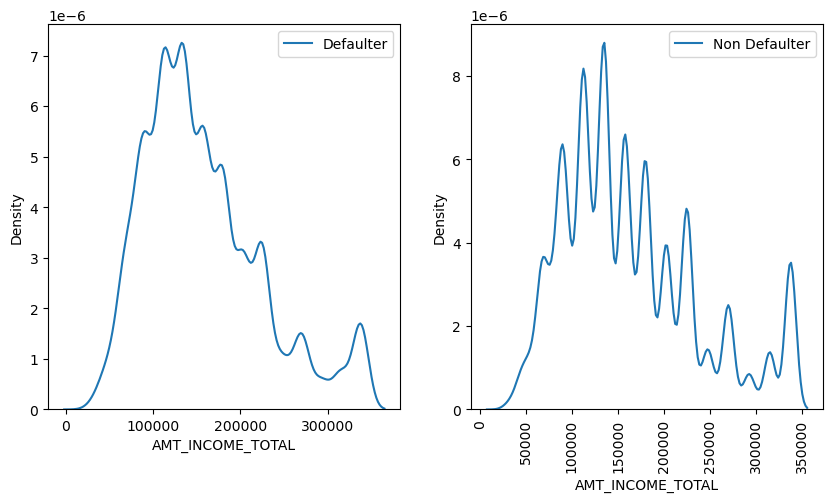

In [188]:
#AMT_INCOME_TOTAL

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.distplot(app_data_1.AMT_INCOME_TOTAL,label='Defaulter',hist=False)
plt.legend()
plt.subplot(1,2,2)
sns.distplot(app_data_0.AMT_INCOME_TOTAL,label='Non Defaulter',hist=False)
plt.xticks(rotation = 90)
plt.legend()
plt.show()

It has been observed that maximum defaulters are those people in whose income is in range 1 to 1.5 lakhs. Also as the income increases to 3 and 3.5 lakhs the count of defaulters decreases.
On the contrary in non defaulters there is a mixed trend. People with high and low income group are all non defaulters.

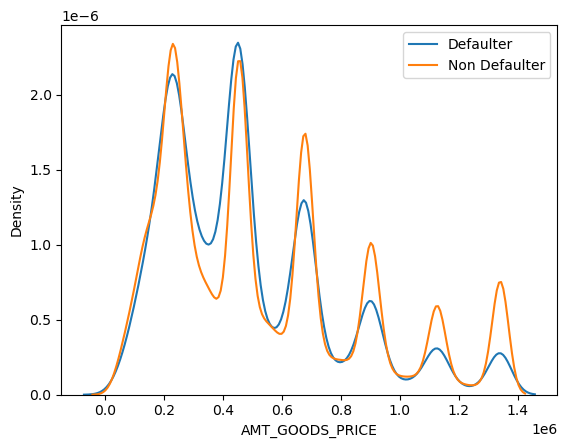

In [184]:
#AMT_GOODS_PRICE
sns.distplot(app_data_1.AMT_GOODS_PRICE,label='Defaulter',hist=False)
sns.distplot(app_data_0.AMT_GOODS_PRICE,label='Non Defaulter',hist=False)
plt.legend()
plt.show()

The curve indicates that both defaulters and non defaulters show a similar trend when compared on basis of price of goods.

## BIVARIATE ANALYSIS

#### Bivariate Analysis
1. Bi: Two, variate: variable means analysing 2 variables at a time
2. purpose: To check the relationship between two variables

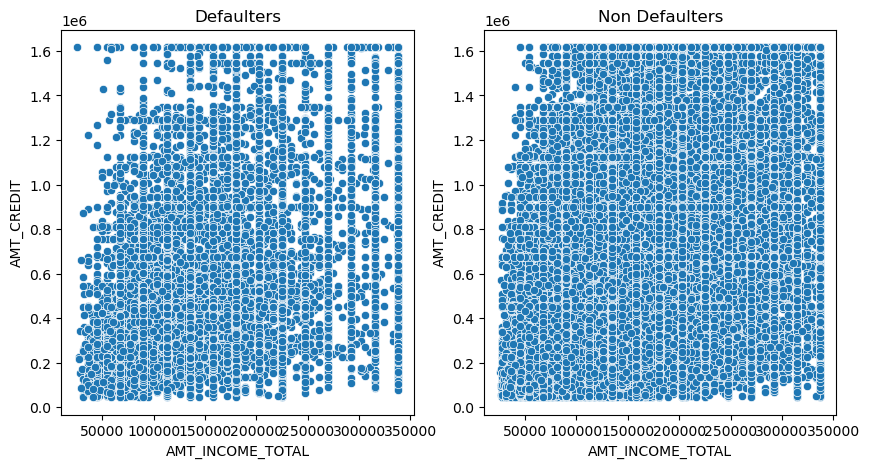

In [185]:
#Income vs credit
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('Defaulters')
sns.scatterplot(x=app_data_1.AMT_INCOME_TOTAL,y=app_data_1.AMT_CREDIT)
plt.subplot(1,2,2)
plt.title('Non Defaulters')
sns.scatterplot(x =app_data_0.AMT_INCOME_TOTAL,y =app_data_0.AMT_CREDIT)
plt.show()

In [187]:
print ("Correlation b/w Income and Credit for defaulters",app_data_1.AMT_INCOME_TOTAL.corr(app_data_1.AMT_CREDIT))
print ("Correlation b/w Income and Credit for non defaulters",app_data_0.AMT_INCOME_TOTAL.corr(app_data_0.AMT_CREDIT))

Correlation b/w Income and Credit for defaulters 0.356198773589607
Correlation b/w Income and Credit for non defaulters 0.4143116680506678


This scatter plot basically provides us how the two variables are realted to each other. 
1. The Defauters data indicate that, the corelation between the income and credit is not that great. It is a positive correlation but here is no linear relation between them
2. The non defaulters scatter plot also indicates that there is no linear relation between Income and Credit

Generally what happens is that if the income of a person is high, he gets a higher credit and if the income of a person is low that person gets lower credit. But here such kind of relation is not established as per the dataset. 

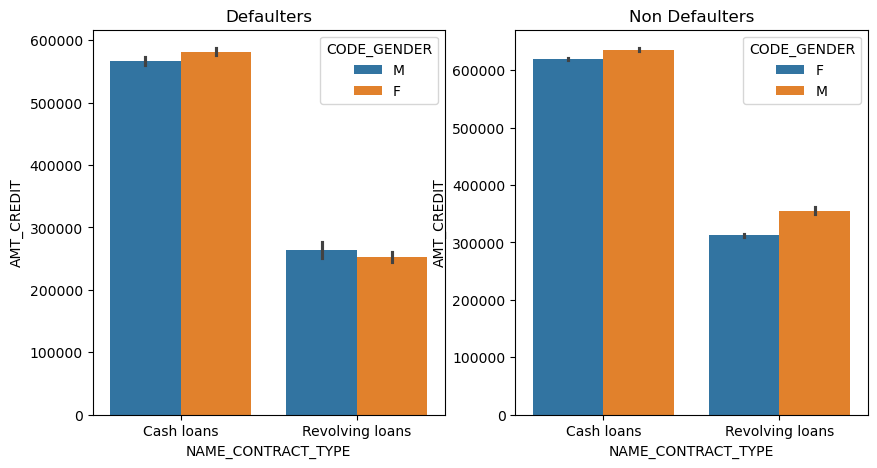

In [189]:
# Gender, amount credit and contract type

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('Defaulters')
sns.barplot(x=app_data_1.NAME_CONTRACT_TYPE,y=app_data_1.AMT_CREDIT,hue=app_data_1.CODE_GENDER)

plt.subplot(1,2,2)
plt.title('Non Defaulters')
sns.barplot(x=app_data_0.NAME_CONTRACT_TYPE,y=app_data_0.AMT_CREDIT,hue=app_data_0.CODE_GENDER)

plt.show()

Observations:

1. The graph clearly indicates that there are more females who get cash loans as compared to males in the defaulters category. Whereas the revolving loans are offered more to men than females.
2. In the non defaulters category the cash loans and revolving loans are more given to male and less to females.

In case of defaulters banks should be more careful about females while giving cash loans and careful for males while giving revolving loans.

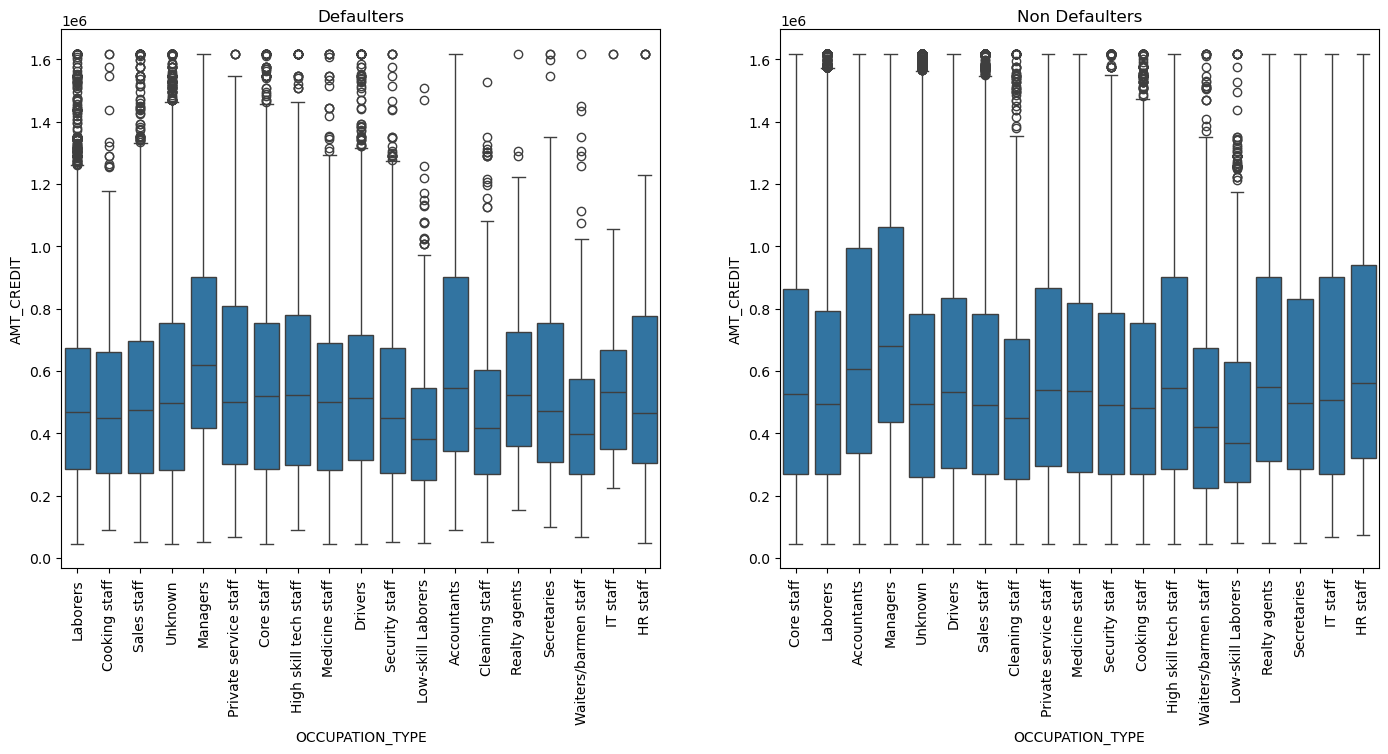

In [190]:
#OCCUPATION TYPE vs CREDIT
plt.figure(figsize=(17,7))
plt.subplot(1,2,1)
plt.title('Defaulters')
sns.boxplot(x = app_data_1.OCCUPATION_TYPE,y =app_data_1.AMT_CREDIT)
plt.xticks(rotation=90)

plt.subplot(1,2,2)
plt.title('Non Defaulters')
sns.boxplot(x = app_data_0.OCCUPATION_TYPE,y =app_data_0.AMT_CREDIT)
plt.xticks(rotation=90)

plt.show()

1. In defaulters 
    - It is seen that Accountants and Managers have come out to be ones who have more amount of credit with them and they are defaulters of loan too. So Banks and financial institutions should be more careful and alert in inspecting/interrogating the assets and paying capacity of managers and accountants while offering loans.
    - In the same manner the next category of occupation that has more credit amount is Private service staff, high skill service staff followed by HR Staff, secretaries and drivers. As per analysis these categories tend to default the loan payment. So banks need to be careful for them
    - The remaining categories are also defaulters but have less loan amounts with them
2. Non Defaulters
    - It is evident that managers and accountants are the ones who have taken maximum loans and have paid the loans on time.
    
So in short the banks should be more vigilant for managers and accountants while giving loan.

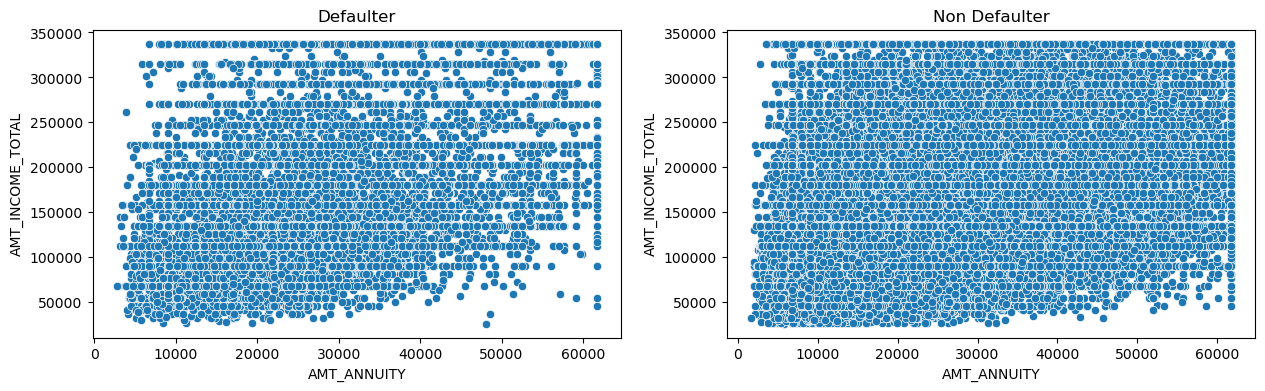

In [191]:
#ANNUITY vs INCOME TOTAL
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.title('Defaulter')
sns.scatterplot(x = app_data_1.AMT_ANNUITY,y=app_data_1.AMT_INCOME_TOTAL)

plt.subplot(1,2,2)
plt.title('Non Defaulter')
sns.scatterplot(x =app_data_0.AMT_ANNUITY,y =app_data_0.AMT_INCOME_TOTAL)
plt.show()

In [201]:
print ("Correlation b/w Income and Annuity for defaulters",app_data_1.AMT_INCOME_TOTAL.corr(app_data_1.AMT_ANNUITY))
print ("Correlation b/w Income and Annuity for non defaulters",app_data_0.AMT_INCOME_TOTAL.corr(app_data_0.AMT_ANNUITY))

Correlation b/w Income and Annuity for defaulters 0.436918201520043
Correlation b/w Income and Annuity for non defaulters 0.4929239210667334


This scatter plot basically provides us how the two variables are realted to each other. 
1. The Defauters data indicate that, the corelation between the income and annuity is not that great. It is a positive correlation but here is no linear relation between them
2. The non defaulters scatter plot also indicates that there is no linear relation between Income and Anuuity


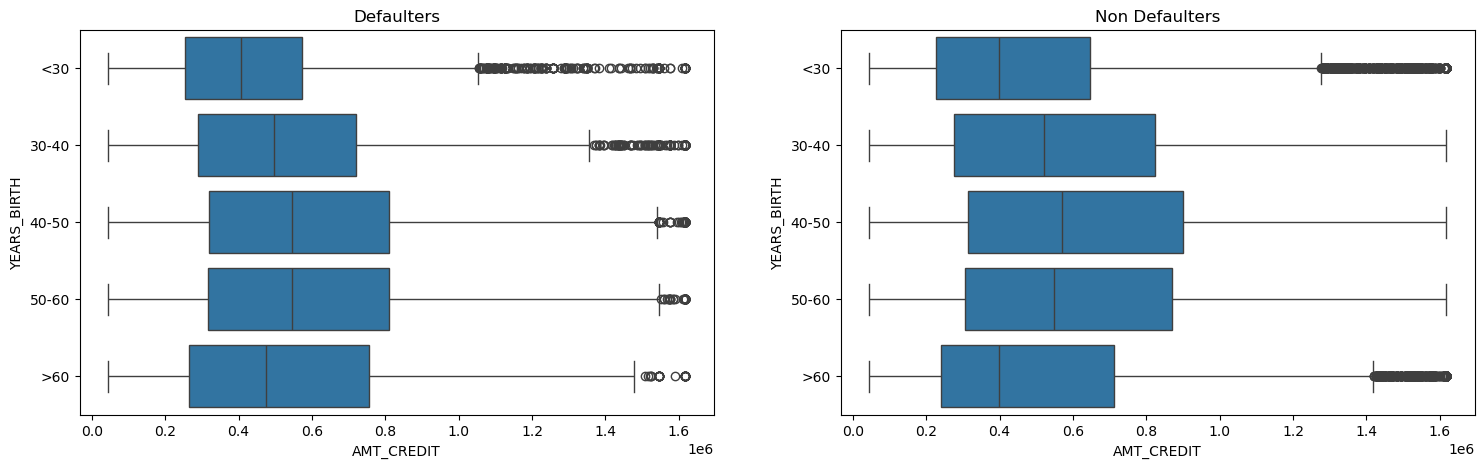

In [202]:
#AGE vs CREDIT
plt.figure(figsize=(18,5))
plt.subplot(1,2,1)
plt.title('Defaulters')
sns.boxplot(x =app_data_1.AMT_CREDIT,y = app_data_1.YEARS_BIRTH)

plt.subplot(1,2,2)
plt.title('Non Defaulters')
sns.boxplot(x =app_data_0.AMT_CREDIT,y =app_data_0.YEARS_BIRTH)

plt.show()

The boxplot indicates the following:
1. In defaulters maximum credit has been taken by people in age group 40-50 and 50-60 followed by people of age more than 60 yrs and then between 30-40 years
2. In defaulters people of age less than 30 years have low credit amount with them.
2. In non defaulters category it is evident that the middle aged people i.e in age group of 40-50 years tend to take more loans followed by old people who are 50 and above then followed by young adults in age of 30-40 years.

From the non defaulters data it can be recommended that people who are less than 30 years take less credit amount and also return the amount as well, so they are trustworthy, also the people of age more than 60 can be trusted by banks in providing loans as they are non defaulters as well. Generally old people have good amount of savings to payback the loans.

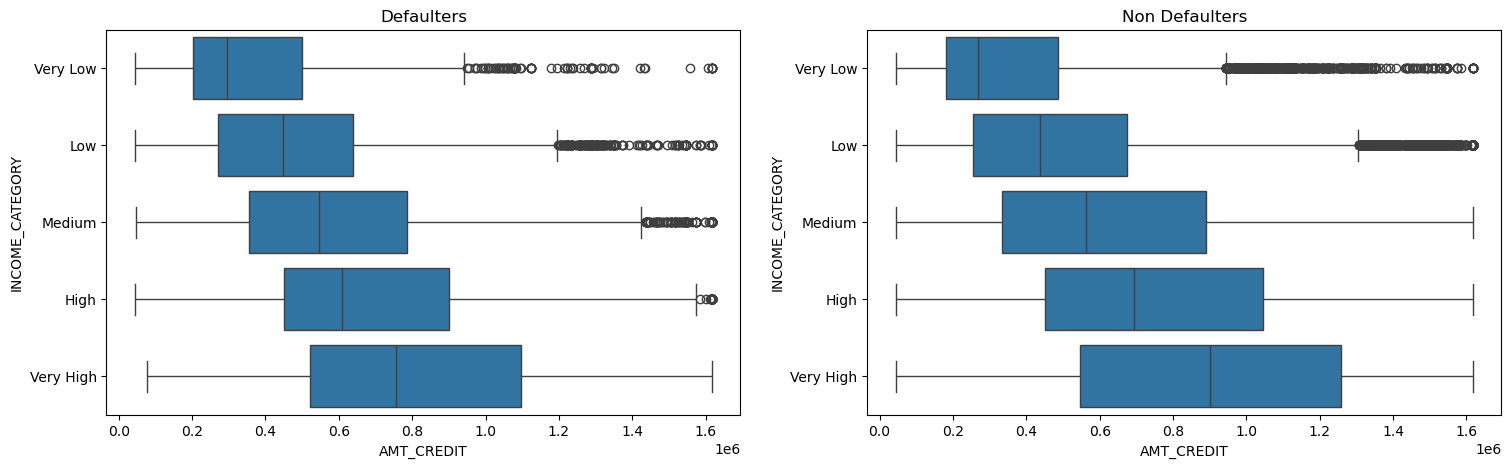

In [203]:
#income category vs Credit

plt.figure(figsize=(18,5))
plt.subplot(1,2,1)
plt.title('Defaulters')
sns.boxplot(x =app_data_1.AMT_CREDIT,y =app_data_1.INCOME_CATEGORY)

plt.subplot(1,2,2)
plt.title('Non Defaulters')
sns.boxplot(x =app_data_0.AMT_CREDIT,y =app_data_0.INCOME_CATEGORY)

plt.show()

The insights from the above graph indicate the following:
1. People who are defaulters with high very high income have more credit amount and the people with low income have low credit.This also indicated that the way the income of defaulters increase so is the increase in the credit amount provided to them. This is quite evident from the median in the defaulter's graph.
2. On the other hand, the same trend is seen in non defaulters as well. But the difference is that, the non defaulters with high and very high income have been given more credit (amount as high as 13 lakhs) as compared to the people in high and very high-income group who fall in defaulters category who get around 11 lakhs.

From pt 2 above it is evident that bank has developed trust on certain people as they are non defaulters and are awarded more credit. Where as the same trust is not for the defaulters in the same income category.


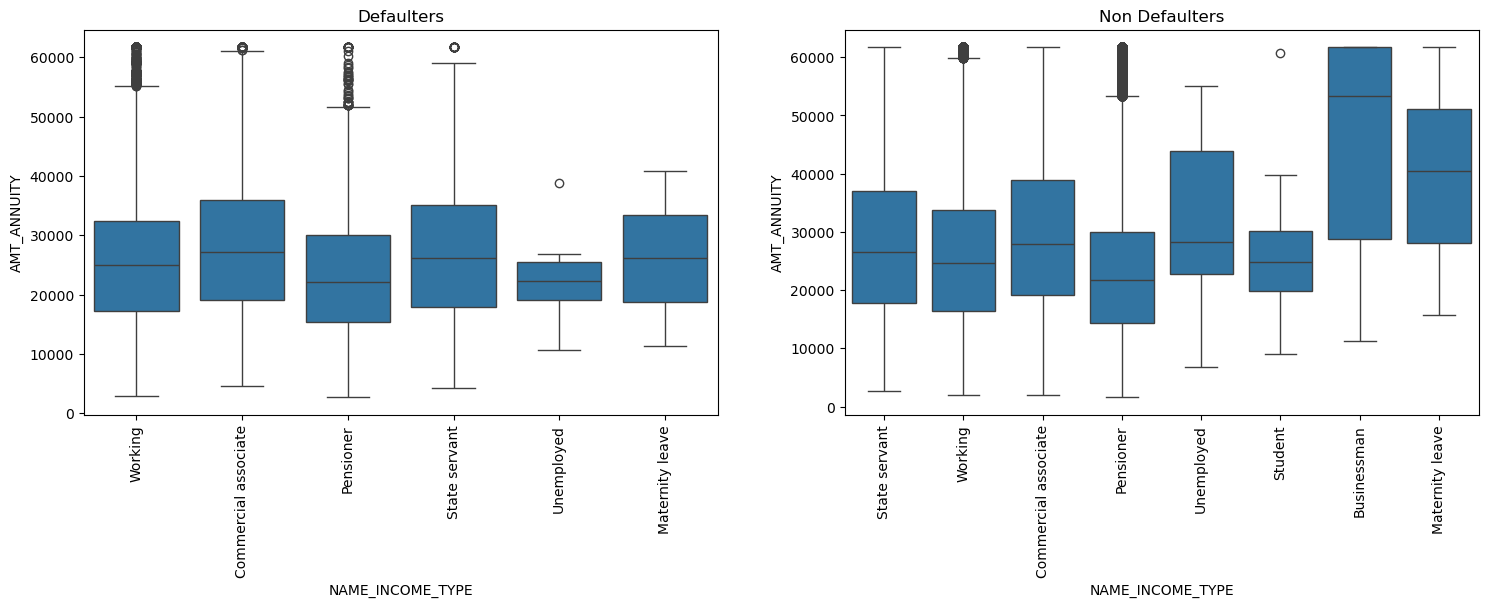

In [204]:
#Annuity vs Income Type

plt.figure(figsize=(18,5))
plt.subplot(1,2,1)
plt.title('Defaulters')
sns.boxplot(x =app_data_1.NAME_INCOME_TYPE,y = app_data_1.AMT_ANNUITY)
plt.xticks(rotation=90)

plt.subplot(1,2,2)
plt.title('Non Defaulters')
sns.boxplot(x =app_data_0.NAME_INCOME_TYPE,y = app_data_0.AMT_ANNUITY)
plt.xticks(rotation=90)

plt.show()

Following are the insights:
1. The people who are defaulters, it has been observed that
    - Commercial associates and state servants that have a similar Annuity amount. The same is the case for the people who are on maternity leave as well. These 3 categories: commercial associates, State servants and those on maternity leave have high annuity assets of value around 35000, a median of 25000 and lower quartile value at around 20000.
    - Also, the unemployed people are the ones who have least annuity amount though the median value is somewhere between 20000 to 25000. 
    - Pensioners being the old people in the income category definitely have more annuity as compared to unemployed people and they share the same median as the unemployed people in the defaulters category.
    - The working people fall in the middle bracket . They have annuity a little above 30000 and median value slightly above the median for pensioners and unemployed. So, these are better off category of people.
The defaulters analysis of Annuity and Income type show us that the Commercial associates, State Servants and people on Maternity leave have high annuity amounts, followed by the working class, pensioners and unemployed respectively
2. People who are non defaulters, it has been observed that
    - Firstly, the businessman are the ones who lead in having high Annuity amount and are non defaulters as well as per the data.
    - The median value for commercial servants and unemployed non defaulters is at the same value of approx 28500. But interestingly the unemployed who are non defaulters have more annuity with them of amount around 45000. This means these unemployed non defaulters have good savings and good investments as compared to the commercial servants
    - On the same lines as above point, it is evident that the working class people and students also have same median annuity value, but working people have more annuity amount as compared to students. This can be for obvious reasons that students have only source of income as pocket money or could be internship which is way less than the income of a working class person. So the non defaulter working people have more annuity value.
    - Non defaulter State servants also enjoy a good annuity amount followed by the least in the category which are the pensioners
    - Interesting to note that maternity leave non defaulters have high annuity amounts.
From the above analysis we can say that the annuity and income type relation between defaulters and non defaulters independently has its own variations. eg Observing the defaulters and non defaulters under each income type they have similar annuity amounts.
eg Observing the defaulters and non defaulters under each income type they have similar annuity amounts.


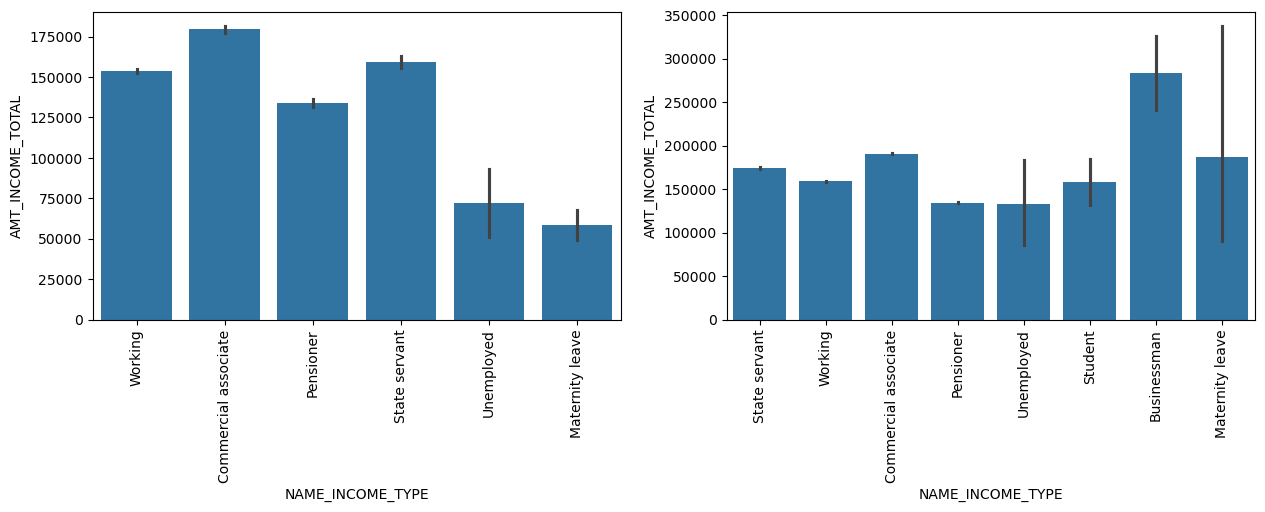

In [205]:
#income type and income
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.barplot(x =app_data_1.NAME_INCOME_TYPE,y =app_data_1.AMT_INCOME_TOTAL)
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.barplot(x =app_data_0.NAME_INCOME_TYPE,y =app_data.AMT_INCOME_TOTAL)
plt.xticks(rotation=90)

plt.show()

Following are the insights:
1. Among the defaulters it is evident that the income bracket for Commercial associates is highest followed by state servants,working class, pensioners and unemployed category
2. Among the non defaulters it is evident that the maximum income bracket is that of the businessman, followed by people on maternity leave,commercial associates, state servants, working class,student,unemployed, and pensioners

Form the above analysis another interesting insight is that the defaulters do not have businessman and students, and it is also seen that these are non defaulters. So businessman and students can be trusted by banks for giving loans.

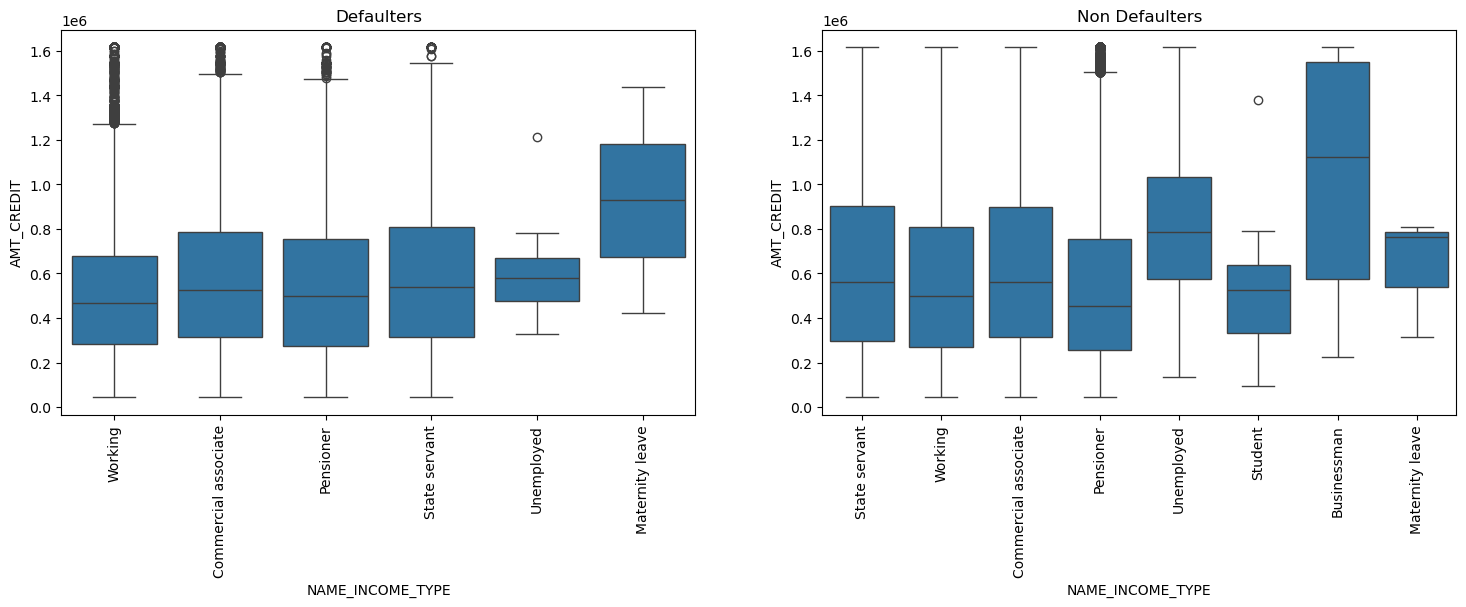

In [206]:
#Credit and Income type
plt.figure(figsize=(18,5))
plt.subplot(1,2,1)
plt.title('Defaulters')
sns.boxplot(x = app_data_1.NAME_INCOME_TYPE,y =app_data_1.AMT_CREDIT)
plt.xticks(rotation=90)

plt.subplot(1,2,2)
plt.title('Non Defaulters')
sns.boxplot(x =app_data_0.NAME_INCOME_TYPE,y =app_data_0.AMT_CREDIT)
plt.xticks(rotation=90)

plt.show()


Observations:
1. People who are defaulters:
    - Under defaulters it has been seen that people take more loans i.e. have more credit amount who are on maternity leave
    - On the other hand commercial associates and state servants have credit values.
    - The working people have low credit amount under defaulters category
    - Pensioners also have loans amounts in the same caegory as commercial associates and state servants
The main reasons behind these can be interpreted as, people who plan a children and go on maternity leave, take more credit as the process involves a lot of finance. 
Also the amount of loan taken by Commercial associates, state servants or working class people are of lesser amount which is between 3lakhs to 7 lakhs approximately.

2. People who are non defaulters:
    - Under non defaulters the businessman are the ones who have high credit amounts in their kitty
    - Business people are followed by unemployed people, who need loans for their living, but they are also non defaulters. They pay their loan.
    - Just like defaulters state servants and commercial associates have same credit pattern followed by the working people
    - However, unlike pensioners in defaulters, the non defaulter pensioners take less credit.
The buisnessmen require more credit to run their business so they have high loan amounts.The unemployed people need loan to meet their ends, so they take loans.Pensioners take less credit as they have their own savings already, but to meet certain uncertainities they make take some loan, so their credit amount is less.

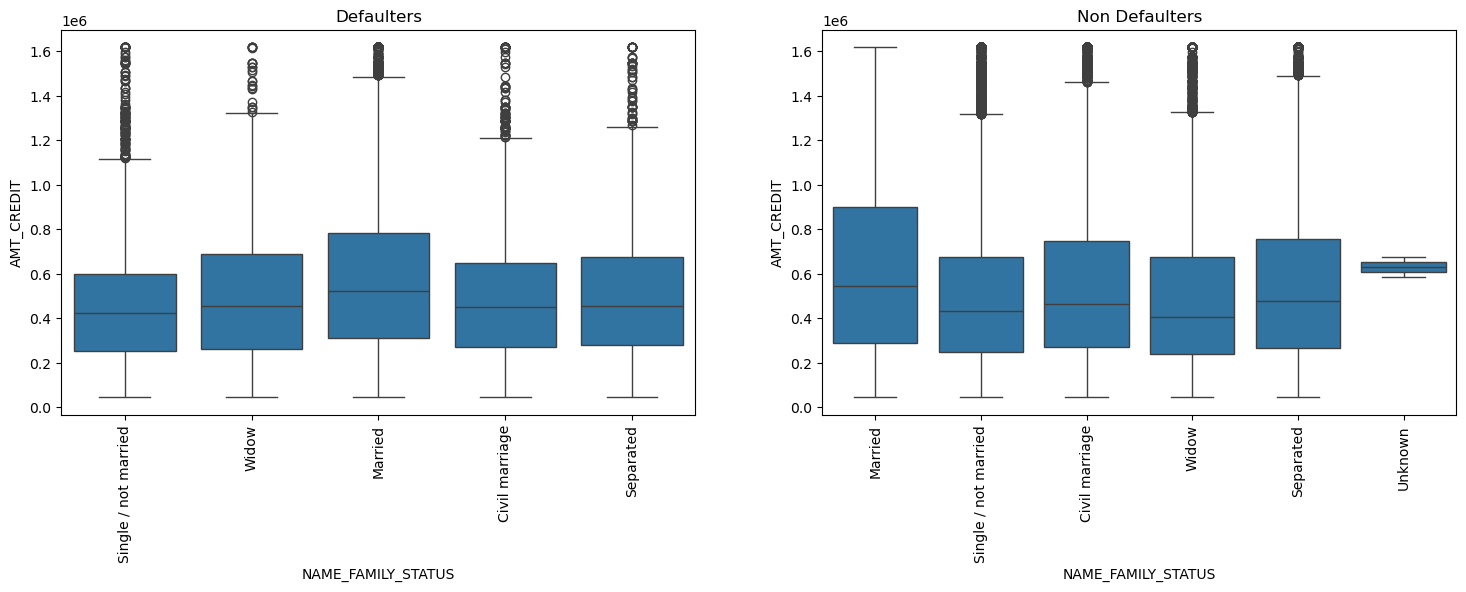

In [207]:
# CREDIT vs FAMILY STATUS

plt.figure(figsize=(18,5))
plt.subplot(1,2,1)
plt.title('Defaulters')
sns.boxplot(x =app_data_1.NAME_FAMILY_STATUS,y =app_data_1.AMT_CREDIT)
plt.xticks(rotation=90)

plt.subplot(1,2,2)
plt.title('Non Defaulters')
sns.boxplot(x = app_data_0.NAME_FAMILY_STATUS,y =app_data_0.AMT_CREDIT)
plt.xticks(rotation=90)

plt.show()

Observations:
1. Defaulters:
    - The boxplot indicates that married people are the ones who take more credit and are defaulters as well
    - The median value for the defaulter widows and the separated category have same loan amounts in their kitty
    - People who are single or have done civil marriage in the defaulters category are the ones who have low credit amounts ranging between 3lakhs to 6 lakhs. These category of people also have the median at the same credit amount.
2. Non Defaulters:
    - In Non defaulters it has been seen that married people have maximum credit amount with them 
    - Those who have done civil marriage or are separated are the ones who have same credit amounts taken and they have median values also same.
    - Similarly single and widow category in family status have same credit maounts taken ranging between 3 lakhs to a little higher than 6 lakhs.
    

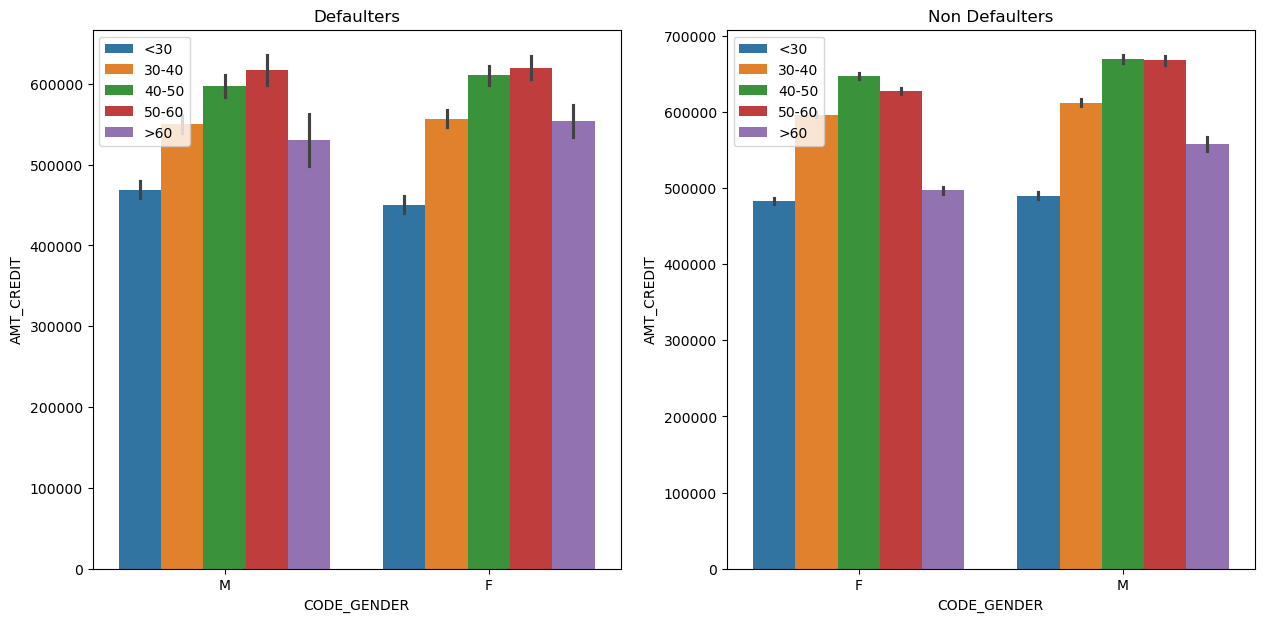

In [208]:
#Gender, Age Category, Credit
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plt.title('Defaulters')
sns.barplot(x=app_data_1.CODE_GENDER,y=app_data_1.AMT_CREDIT,hue=app_data_1.YEARS_BIRTH)
plt.legend(loc='upper left')

plt.subplot(1,2,2)
plt.title('Non Defaulters')
sns.barplot(x=app_data_0.CODE_GENDER,y=app_data_0.AMT_CREDIT,hue=app_data_0.YEARS_BIRTH)

plt.legend(loc='upper left')
plt.show()

Insights are as follows:
1. In defaulters category it is quite evident that male aged between 50-60 and 40-50 take more credit amounts and are defaulters as well. In females also, age groups of 50-60 and 40-50 take more credit followed by the old aged (>60) and young adult (30-40) category. The most safe bet for bank to provide loans can be Young adult male and females as there are less defaulters in this category but with thorough checks and background scrutiny
2. In non defaulters maximum loan is with middle aged (40-50) male and female followed by old aged and young adults.

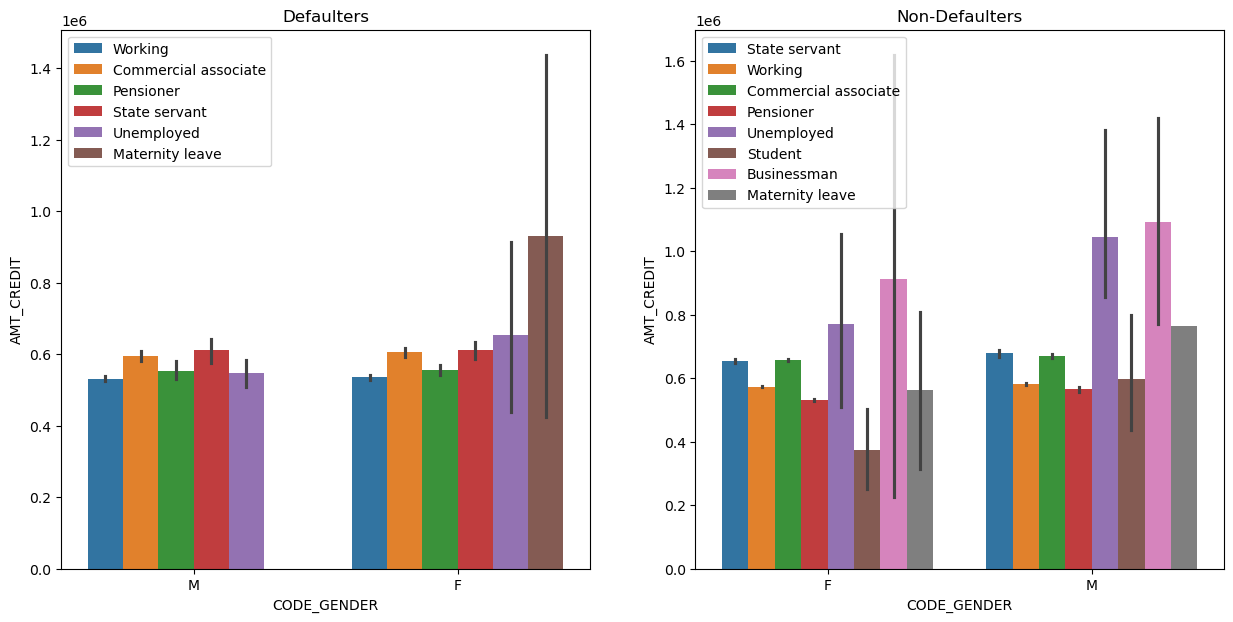

In [209]:
#Gender, Income Type, Credit
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plt.title('Defaulters')
sns.barplot(x=app_data_1.CODE_GENDER,y=app_data_1.AMT_CREDIT,hue=app_data_1.NAME_INCOME_TYPE)
plt.legend(loc='upper left')

plt.subplot(1,2,2)
plt.title('Non-Defaulters')
sns.barplot(x=app_data_0.CODE_GENDER,y=app_data_0.AMT_CREDIT,hue=app_data_0.NAME_INCOME_TYPE)
plt.legend(loc='upper left')
plt.show()

Observations:
1. Defaulters:
    - The females on maternity leave tend to take higher credit and are the major defaulters as well. 
    - Whereas defaulter males it is seen that the ones whose income source is sate or are working as state servants and those who are commercial associates take loan of high amount. 
So in defaulters category, banks should be careful while giving loan to pregnant women.

2. Non Defaulters:
    - From the plot it is evident that the businessmen whether male or female are the ones who take more loans and are also non defaulters. So these are the safe bet for banks to provide loan to.

Also an important thing to note is that businessman and student category are not in defaulters category.

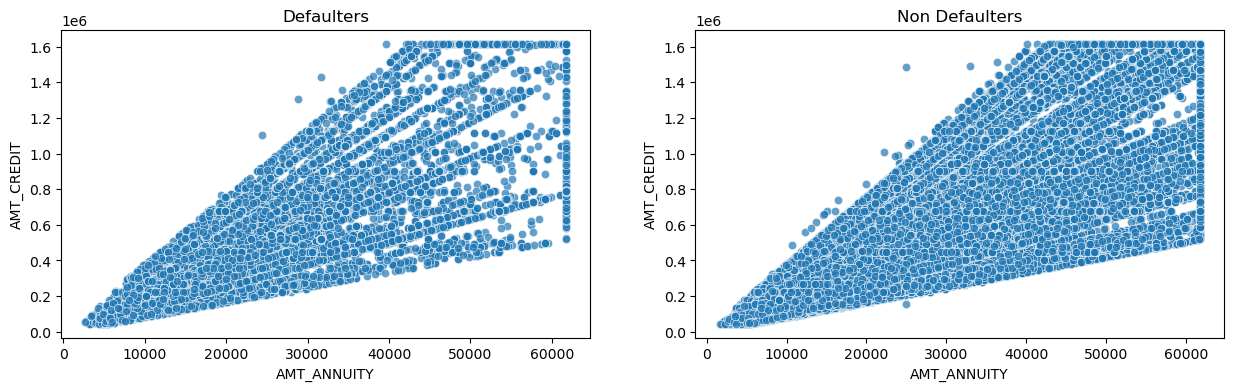

In [210]:
#Annuity vs Credit

plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.title('Defaulters')
sns.scatterplot(x =app_data_1.AMT_ANNUITY,y =app_data_1.AMT_CREDIT,alpha=0.7)
plt.subplot(1,2,2)
plt.title('Non Defaulters')
sns.scatterplot(x =app_data_0.AMT_ANNUITY, y =app_data_0.AMT_CREDIT,alpha=0.7)

plt.show()

In [212]:
print ("Correlation b/w Annuity and Credit for defaulters",app_data_1.AMT_ANNUITY.corr(app_data_1.AMT_CREDIT))
print ("Correlation b/w Annuity and Credit for non defaulters",app_data_0.AMT_ANNUITY.corr(app_data_0.AMT_CREDIT))

Correlation b/w Annuity and Credit for defaulters 0.7601234136216813
Correlation b/w Annuity and Credit for non defaulters 0.7948069192368785


The scatterplots between Annuity and Credit indicate that they have positive correlation and have linear correlation between the two variables. A person with more Annuity assets has better chance to get higher credits and vice versa

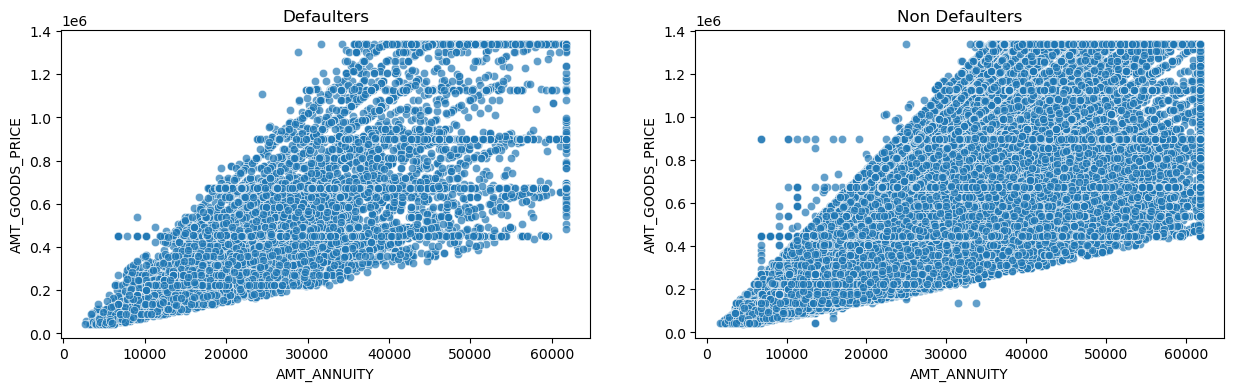

In [213]:
#Annuity vs Goods Price

plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.title('Defaulters')
sns.scatterplot(x = app_data_1.AMT_ANNUITY,y =app_data_1.AMT_GOODS_PRICE,alpha=0.7)
plt.subplot(1,2,2)
plt.title('Non Defaulters')
sns.scatterplot(x =app_data_0.AMT_ANNUITY,y =app_data_0.AMT_GOODS_PRICE,alpha=0.7)

plt.show()

In [214]:
print ("Correlation b/w Annuity and Goods Price for defaulters",app_data_1.AMT_ANNUITY.corr(app_data_1.AMT_GOODS_PRICE))
print ("Correlation b/w Annuity and Goods Price for non defaulters",app_data_0.AMT_ANNUITY.corr(app_data_0.AMT_GOODS_PRICE))

Correlation b/w Annuity and Goods Price for defaulters 0.7602866472620413
Correlation b/w Annuity and Goods Price for non defaulters 0.7973160902510782


The scatterplots between Annuity and Good Price indicate that they have positive correlation and also some linear correlation is also seen between the two variables. But one is not the cause for other. That is there is no causation. Increase in goods price does not increase the Annuity, even though there is strong correlation between them.

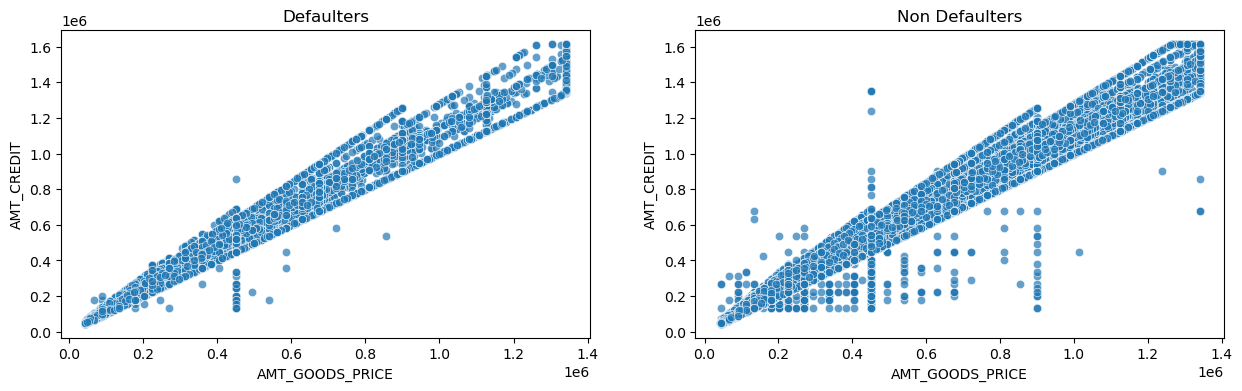

In [215]:
#Goods Price vs Credit
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.title('Defaulters')
sns.scatterplot(x =app_data_1.AMT_GOODS_PRICE, y =app_data_1.AMT_CREDIT,alpha=0.7)
plt.subplot(1,2,2)
plt.title('Non Defaulters')
sns.scatterplot(x =app_data_0.AMT_GOODS_PRICE,y =app_data_0.AMT_CREDIT,alpha=0.7)

plt.show()

In [217]:
print ("Correlation b/w Goods Price and Credit for defaulters",app_data_1.AMT_GOODS_PRICE.corr(app_data_1.AMT_CREDIT))
print ("Correlation b/w Goods Price and Credit for non defaulters",app_data_0.AMT_GOODS_PRICE.corr(app_data_0.AMT_CREDIT))

Correlation b/w Goods Price and Credit for defaulters 0.9818366038380503
Correlation b/w Goods Price and Credit for non defaulters 0.9855849958075661


There is very high correlation between Goods Price and Credit for defaulters. In Non defaulters also the correlation is positive and linear but some outliers are also there. The correlation of 98% is quite high for the two variables. So overall we can say that as the goods price increase the credit amount also increases.

## STEP 6 MULTIVARIATE ANALYSIS

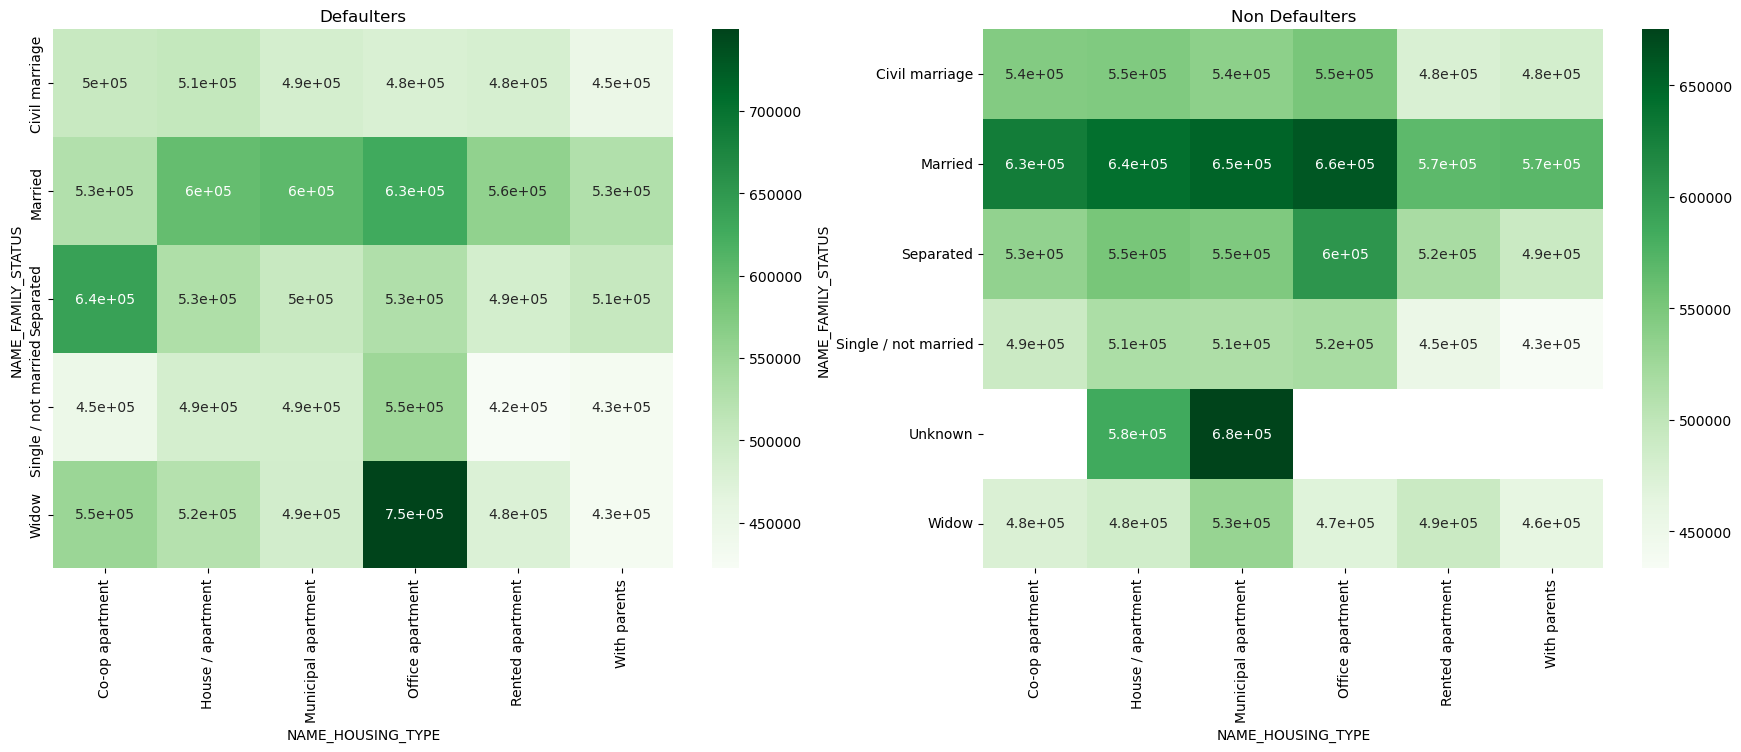

In [218]:
#Housing Type vs Family Status vs Crdit amount
df=pd.pivot_table(index='NAME_FAMILY_STATUS',columns='NAME_HOUSING_TYPE',values='AMT_CREDIT',data=app_data_1,aggfunc='mean')
df0=pd.pivot_table(index='NAME_FAMILY_STATUS',columns='NAME_HOUSING_TYPE',values='AMT_CREDIT',data=app_data_0,aggfunc='mean')

plt.figure(figsize=(22,7))
plt.subplot(1,2,1)
plt.title('Defaulters')
sns.heatmap(df,cmap='Greens',annot=True)


plt.subplot(1,2,2)
plt.title('Non Defaulters')
sns.heatmap(df0,cmap='Greens',annot=True)


plt.show()

1. Defaulters:
    - The heatmap for defaulters indicate that widows and office apartment housing type has a vey strong correlation, followed by separated and Co-op apartment. 
    - One more thing to be observed is that married people have a positive correlation with all the housing types and also a strong relation we can say by the colour of the boxes.
2. Non defaulters:
    - The strongest correlation exists between married people and Office Apartment.
    - In fact married people have strong correlation with all the housing types
    

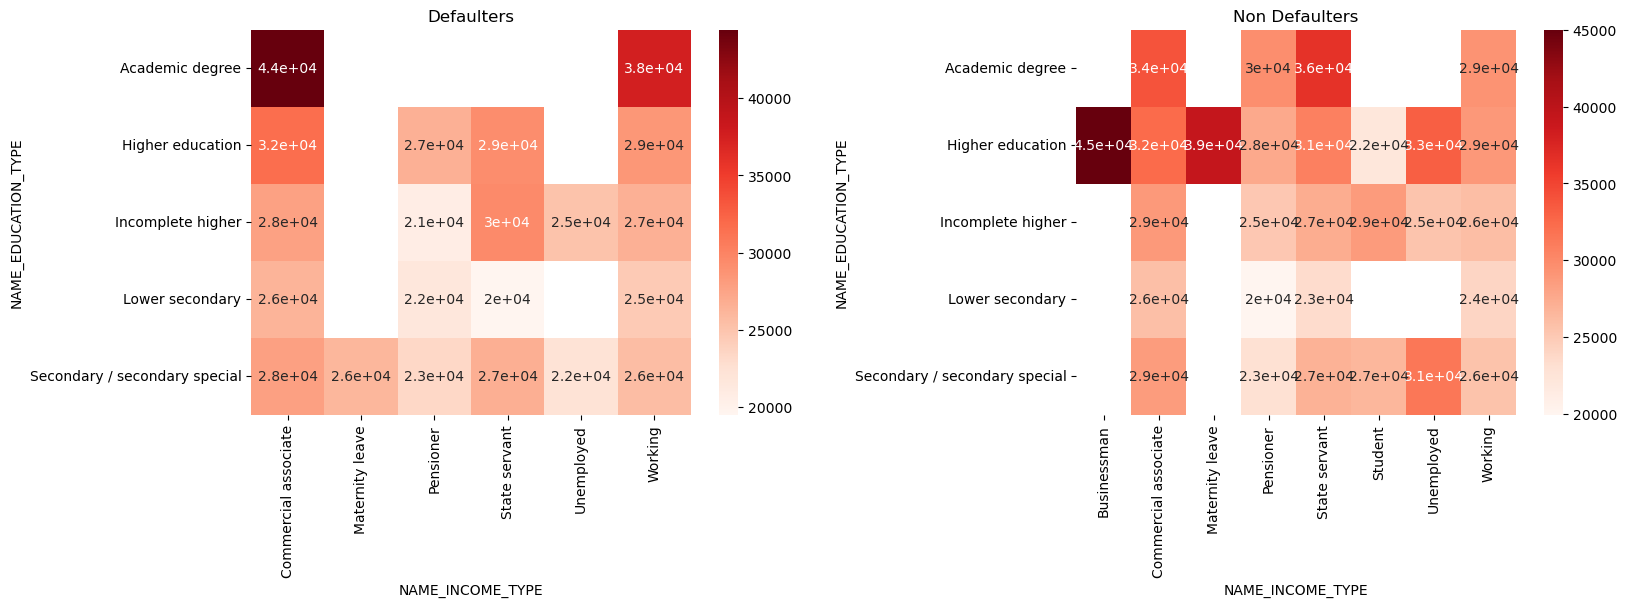

In [219]:
#Education vs Income Type vs Annuity

df1=pd.pivot_table(index='NAME_EDUCATION_TYPE',columns='NAME_INCOME_TYPE',values='AMT_ANNUITY',data=app_data_1,aggfunc='mean')
df_1=pd.pivot_table(index='NAME_EDUCATION_TYPE',columns='NAME_INCOME_TYPE',values='AMT_ANNUITY',data=app_data_0,aggfunc='mean')

plt.figure(figsize=(25,7))
plt.subplot(1,2,1)
plt.title('Defaulters')
sns.heatmap(df1,cmap='Reds',annot=True)


plt.subplot(1,2,2)
plt.title('Non Defaulters')
sns.heatmap(df_1,cmap='Reds',annot=True)

plt.subplots_adjust(left=0.05, bottom=0.05, right=0.6, top=0.6, wspace=0.5, hspace=1.0)
plt.show()

1. Defaulters:

    - The heatmap shows that the relation between academic degree and commercial associate is highly correlated whereas the lower sec is least correlated with any of the Income types 
2. Non Defaulters:
    - We can depict from the graph that the higher education is the favourably corelated with Businessman 

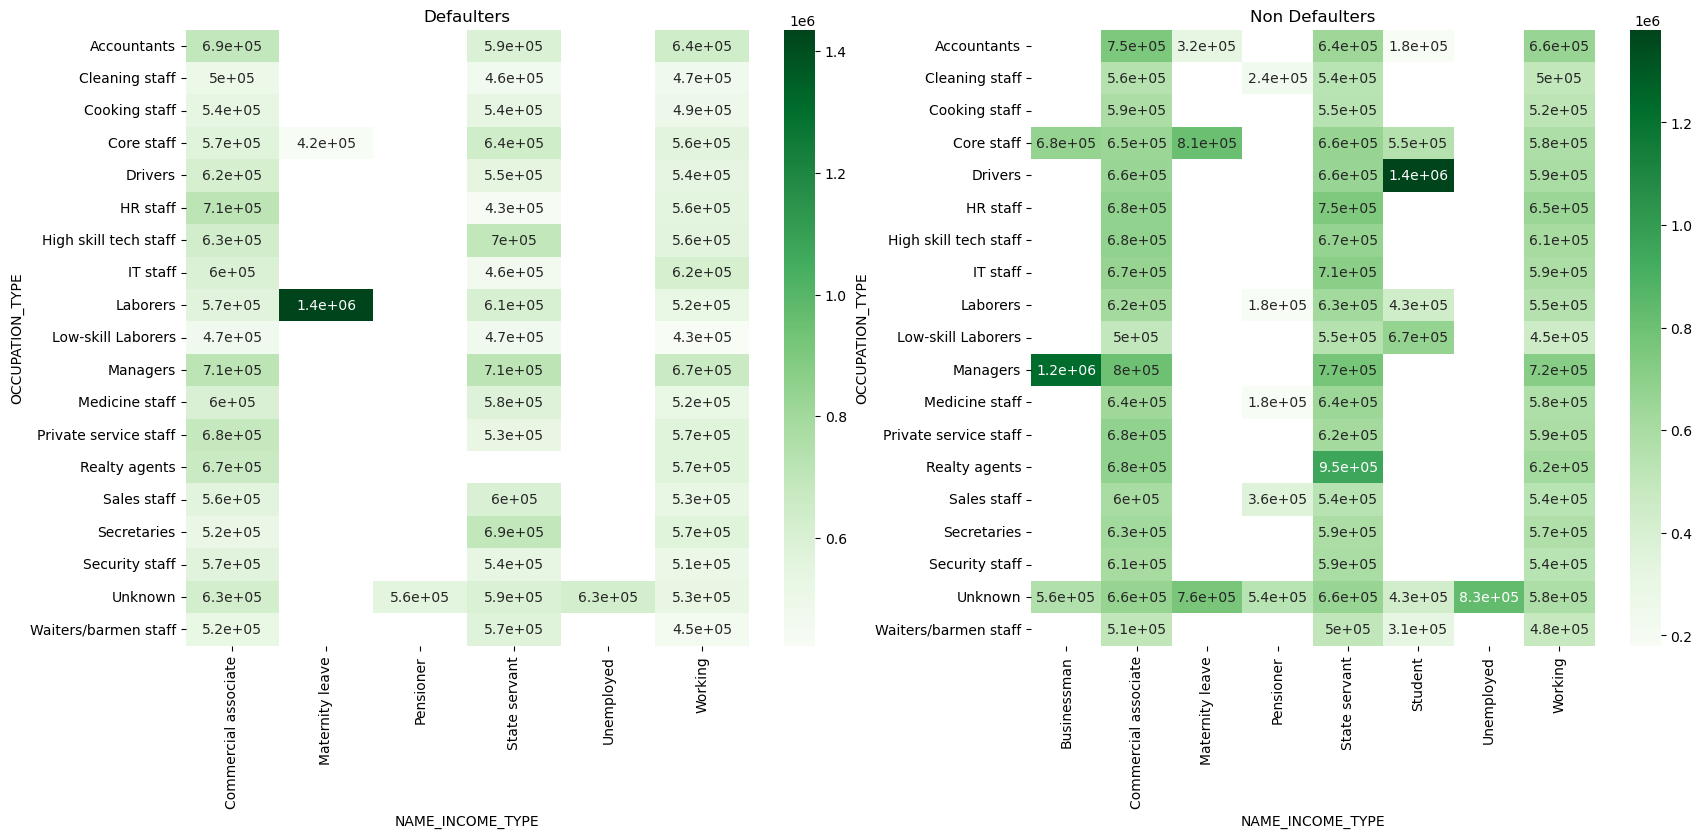

In [220]:
df2=pd.pivot_table(index='OCCUPATION_TYPE',columns='NAME_INCOME_TYPE',values='AMT_CREDIT',data=app_data_1,aggfunc='mean')
df3=pd.pivot_table(index='OCCUPATION_TYPE',columns='NAME_INCOME_TYPE',values='AMT_CREDIT',data=app_data_0,aggfunc='mean')

plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.title('Defaulters')
sns.heatmap(df2,cmap='Greens',annot=True)

plt.subplot(1,2,2)
plt.title('Non Defaulters')
sns.heatmap(df3,cmap='Greens',annot=True)

plt.show()

1. Defaulters:
    - It is seen that labourers have string correlation with maternity leave income type. 
2. Non Defaulters:
    - In Non defaulters high correlation is seen between Occupation Type of Drivers and Income Type Students followed by Managers and Commercial Associates

## Step 7: Previous Application Data

In [221]:
# loading the previous application data file
prev_data = pd.read_csv(r'C:\Users\admin\Desktop\Main Program\EDA Assignment\previous_application.csv')
prev_data.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   D

In [222]:
# Checking data set info
prev_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [223]:
#Checking mathematical parameters of data
prev_data.describe()

SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION  \
count  1.670214e+06  1.670214e+06  1.297979e+06     1.670214e+06   
mean   1.923089e+06  2.783572e+05  1.595512e+04     1.752339e+05   
std    5.325980e+05  1.028148e+05  1.478214e+04     2.927798e+05   
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00   
25%    1.461857e+06  1.893290e+05  6.321780e+03     1.872000e+04   
50%    1.923110e+06  2.787145e+05  1.125000e+04     7.104600e+04   
75%    2.384280e+06  3.675140e+05  2.065842e+04     1.803600e+05   
max    2.845382e+06  4.562550e+05  4.180581e+05     6.905160e+06   

         AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
count  1.670213e+06      7.743700e+05     1.284699e+06   
mean   1.961140e+05      6.697402e+03     2.278473e+05   
std    3.185746e+05      2.092150e+04     3.153966e+05   
min    0.000000e+00     -9.000000e-01     0.000000e+00   
25%    2.416050e+04      0.000000e+00     5.084100e+04   
50%    8.054100e+04      1.638000e+03     1.123200e+05   
75%    2.164185e+05      7.740000e+03     2.340000e+05   
max    6.905160e+06      3.060045e+06     6.905160e+06   

       HOUR_APPR_PROCESS_START  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  \
count             1.670214e+06            1.670214e+06      774370.000000   
mean              1.248418e+01            9.964675e-01           0.079637   
std               3.334028e+00            5.932963e-02           0.107823   
min               0.000000e+00            0.000000e+00          -0.000015   
25%               1.000000e+01            1.000000e+00           0.000000   
50%               1.200000e+01            1.000000e+00           0.051605   
75%               1.500000e+01            1.000000e+00           0.108909   
max               2.300000e+01            1.000000e+00           1.000000   

       RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED  DAYS_DECISION  \
count            5951.000000               5951.000000   1.670214e+06   
mean                0.188357                  0.773503  -8.806797e+02   
std                 0.087671                  0.100879   7.790997e+02   
min                 0.034781                  0.373150  -2.922000e+03   
25%                 0.160716                  0.715645  -1.300000e+03   
50%                 0.189122                  0.835095  -5.810000e+02   
75%                 0.193330                  0.852537  -2.800000e+02   
max                 1.000000                  1.000000  -1.000000e+00   

       SELLERPLACE_AREA   CNT_PAYMENT  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  \
count      1.670214e+06  1.297984e+06       997149.000000   997149.000000   
mean       3.139511e+02  1.605408e+01       342209.855039    13826.269337   
std        7.127443e+03  1.456729e+01        88916.115834    72444.869708   
min       -1.000000e+00  0.000000e+00        -2922.000000    -2892.000000   
25%       -1.000000e+00  6.000000e+00       365243.000000    -1628.000000   
50%        3.000000e+00  1.200000e+01       365243.000000     -831.000000   
75%        8.200000e+01  2.400000e+01       365243.000000     -411.000000   
max        4.000000e+06  8.400000e+01       365243.000000   365243.000000   

       DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
count              997149.000000  997149.000000     997149.000000   
mean                33767.774054   76582.403064      81992.343838   
std                106857.034789  149647.415123     153303.516729   
min                 -2801.000000   -2889.000000      -2874.000000   
25%                 -1242.000000   -1314.000000      -1270.000000   
50%                  -361.000000    -537.000000       -499.000000   
75%                   129.000000     -74.000000        -44.000000   
max                365243.000000  365243.000000     365243.000000   

       NFLAG_INSURED_ON_APPROVAL  
count              997149.000000  
mean                    0.332570  
std                     0.471134  
min                     0.000000  
25%                     0.0000

In [224]:
#Checking data types of each column
prev_data.dtypes

SK_ID_PREV                       int64
SK_ID_CURR                       int64
NAME_CONTRACT_TYPE              object
AMT_ANNUITY                    float64
AMT_APPLICATION                float64
AMT_CREDIT                     float64
AMT_DOWN_PAYMENT               float64
AMT_GOODS_PRICE                float64
WEEKDAY_APPR_PROCESS_START      object
HOUR_APPR_PROCESS_START          int64
FLAG_LAST_APPL_PER_CONTRACT     object
NFLAG_LAST_APPL_IN_DAY           int64
RATE_DOWN_PAYMENT              float64
RATE_INTEREST_PRIMARY          float64
RATE_INTEREST_PRIVILEGED       float64
NAME_CASH_LOAN_PURPOSE          object
NAME_CONTRACT_STATUS            object
DAYS_DECISION                    int64
NAME_PAYMENT_TYPE               object
CODE_REJECT_REASON              object
NAME_TYPE_SUITE                 object
NAME_CLIENT_TYPE                object
NAME_GOODS_CATEGORY             object
NAME_PORTFOLIO                  object
NAME_PRODUCT_TYPE               object
CHANNEL_TYPE             

In [225]:
prev_data.shape

(1670214, 37)

In [226]:
## Identifying missing values and Rectifying them

prev_data.isnull().mean() 

SK_ID_PREV                     0.000000e+00
SK_ID_CURR                     0.000000e+00
NAME_CONTRACT_TYPE             0.000000e+00
AMT_ANNUITY                    2.228667e-01
AMT_APPLICATION                0.000000e+00
AMT_CREDIT                     5.987257e-07
AMT_DOWN_PAYMENT               5.363648e-01
AMT_GOODS_PRICE                2.308177e-01
WEEKDAY_APPR_PROCESS_START     0.000000e+00
HOUR_APPR_PROCESS_START        0.000000e+00
FLAG_LAST_APPL_PER_CONTRACT    0.000000e+00
NFLAG_LAST_APPL_IN_DAY         0.000000e+00
RATE_DOWN_PAYMENT              5.363648e-01
RATE_INTEREST_PRIMARY          9.964370e-01
RATE_INTEREST_PRIVILEGED       9.964370e-01
NAME_CASH_LOAN_PURPOSE         0.000000e+00
NAME_CONTRACT_STATUS           0.000000e+00
DAYS_DECISION                  0.000000e+00
NAME_PAYMENT_TYPE              0.000000e+00
CODE_REJECT_REASON             0.000000e+00
NAME_TYPE_SUITE                4.911975e-01
NAME_CLIENT_TYPE               0.000000e+00
NAME_GOODS_CATEGORY            0

In [227]:
#Dropping the columns having missing values greater than 40%

cutoff = 40
col_to_drop = list(prev_data.columns[prev_data.isnull().mean()*100>=cut_off])
col_to_drop 


['AMT_DOWN_PAYMENT',
 'RATE_DOWN_PAYMENT',
 'RATE_INTEREST_PRIMARY',
 'RATE_INTEREST_PRIVILEGED',
 'NAME_TYPE_SUITE',
 'DAYS_FIRST_DRAWING',
 'DAYS_FIRST_DUE',
 'DAYS_LAST_DUE_1ST_VERSION',
 'DAYS_LAST_DUE',
 'DAYS_TERMINATION',
 'NFLAG_INSURED_ON_APPROVAL']

In [228]:
prev_data.drop(col_to_drop, axis = 1, inplace = True)

In [229]:
prev_data.shape

(1670214, 26)

In [230]:
prev_data.isnull().sum()

SK_ID_PREV                          0
SK_ID_CURR                          0
NAME_CONTRACT_TYPE                  0
AMT_ANNUITY                    372235
AMT_APPLICATION                     0
AMT_CREDIT                          1
AMT_GOODS_PRICE                385515
WEEKDAY_APPR_PROCESS_START          0
HOUR_APPR_PROCESS_START             0
FLAG_LAST_APPL_PER_CONTRACT         0
NFLAG_LAST_APPL_IN_DAY              0
NAME_CASH_LOAN_PURPOSE              0
NAME_CONTRACT_STATUS                0
DAYS_DECISION                       0
NAME_PAYMENT_TYPE                   0
CODE_REJECT_REASON                  0
NAME_CLIENT_TYPE                    0
NAME_GOODS_CATEGORY                 0
NAME_PORTFOLIO                      0
NAME_PRODUCT_TYPE                   0
CHANNEL_TYPE                        0
SELLERPLACE_AREA                    0
NAME_SELLER_INDUSTRY                0
CNT_PAYMENT                    372230
NAME_YIELD_GROUP                    0
PRODUCT_COMBINATION               346
dtype: int64

#### Data Correction
1. Imputing Missing values
2. Correcting Data types if any
3. Rectifying the negative values

In [231]:
# imputing annuity column with median as outliers are least affected by median
prev_data.AMT_ANNUITY.fillna(prev_data.AMT_ANNUITY.median(),inplace=True)

In [232]:
# imputing Goods Price column with median as outliers are least affected by median
prev_data.AMT_GOODS_PRICE.fillna(prev_data.AMT_GOODS_PRICE.median(),inplace=True)

In [233]:
# imputing CNT_PAYMENT column with median as outliers are least affected by median
prev_data.CNT_PAYMENT.fillna(prev_data.CNT_PAYMENT.median(),inplace=True)

In [234]:
#imputing amt credit column with median as outliers are least affected by median
prev_data.AMT_CREDIT.fillna(prev_data.AMT_CREDIT.median(),inplace=True)

In [235]:
#PRODUCT COMBINATION
prev_data.PRODUCT_COMBINATION.unique()

array(['POS mobile with interest', 'Cash X-Sell: low',
       'Cash X-Sell: high', 'Cash X-Sell: middle', 'Cash Street: high',
       'Cash', 'POS household without interest',
       'POS household with interest', 'POS other with interest',
       'Card X-Sell', 'POS mobile without interest', 'Card Street',
       'POS industry with interest', 'Cash Street: low',
       'POS industry without interest', 'Cash Street: middle',
       'POS others without interest', nan], dtype=object)

In [236]:
# replacing nan values in Product Combination column as Unknown category
prev_data.PRODUCT_COMBINATION.replace(np.nan,'Unknown',inplace=True)

In [237]:
prev_data.PRODUCT_COMBINATION.value_counts()

PRODUCT_COMBINATION
Cash                              285990
POS household with interest       263622
POS mobile with interest          220670
Cash X-Sell: middle               143883
Cash X-Sell: low                  130248
Card Street                       112582
POS industry with interest         98833
POS household without interest     82908
Card X-Sell                        80582
Cash Street: high                  59639
Cash X-Sell: high                  59301
Cash Street: middle                34658
Cash Street: low                   33834
POS mobile without interest        24082
POS other with interest            23879
POS industry without interest      12602
POS others without interest         2555
Unknown                              346
Name: count, dtype: int64

In [238]:
prev_data.DAYS_DECISION.unique()

array([  -73,  -164,  -301, ..., -1967, -2389,    -1], dtype=int64)

In [239]:
# coverting the days values from negative to positive
prev_data.DAYS_DECISION=abs(prev_data.DAYS_DECISION)

In [240]:
prev_data.SELLERPLACE_AREA.unique()

array([  35,   -1,  200, ..., 2233,  887, 2420], dtype=int64)

In [241]:
# converting area from negaitive to positive

prev_data.SELLERPLACE_AREA=abs(prev_data.SELLERPLACE_AREA)

In [242]:
prev_data.isnull().sum()

SK_ID_PREV                     0
SK_ID_CURR                     0
NAME_CONTRACT_TYPE             0
AMT_ANNUITY                    0
AMT_APPLICATION                0
AMT_CREDIT                     0
AMT_GOODS_PRICE                0
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_PROCESS_START        0
FLAG_LAST_APPL_PER_CONTRACT    0
NFLAG_LAST_APPL_IN_DAY         0
NAME_CASH_LOAN_PURPOSE         0
NAME_CONTRACT_STATUS           0
DAYS_DECISION                  0
NAME_PAYMENT_TYPE              0
CODE_REJECT_REASON             0
NAME_CLIENT_TYPE               0
NAME_GOODS_CATEGORY            0
NAME_PORTFOLIO                 0
NAME_PRODUCT_TYPE              0
CHANNEL_TYPE                   0
SELLERPLACE_AREA               0
NAME_SELLER_INDUSTRY           0
CNT_PAYMENT                    0
NAME_YIELD_GROUP               0
PRODUCT_COMBINATION            0
dtype: int64

In [243]:
#checking values for WEEKDAY_APPR_PROCESS_START
prev_data.WEEKDAY_APPR_PROCESS_START.unique()

array(['SATURDAY', 'THURSDAY', 'TUESDAY', 'MONDAY', 'FRIDAY', 'SUNDAY',
       'WEDNESDAY'], dtype=object)

In [244]:
# checking values for HOUR_APPR_PROCESS_START
prev_data.HOUR_APPR_PROCESS_START.unique()

array([15, 11,  7,  9,  8, 10, 12, 13, 14, 16,  6,  4,  5, 19, 17, 18, 20,
       22, 21,  3,  1,  2, 23,  0], dtype=int64)

In [245]:
prev_data.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION'],
      dtype='object')

In [246]:
# checking values for FLAG_LAST_APPL_PER_CONTRACT
prev_data.FLAG_LAST_APPL_PER_CONTRACT.unique()

array(['Y', 'N'], dtype=object)

In [247]:
# checking values for NFLAG_LAST_APPL_IN_DAY
prev_data.NFLAG_LAST_APPL_IN_DAY.unique()

array([1, 0], dtype=int64)

In [248]:
# checking values for NAME_CASH_LOAN_PURPOSE
prev_data.NAME_CASH_LOAN_PURPOSE.unique()

array(['XAP', 'XNA', 'Repairs', 'Everyday expenses', 'Car repairs',
       'Building a house or an annex', 'Other', 'Journey',
       'Purchase of electronic equipment', 'Medicine',
       'Payments on other loans', 'Urgent needs', 'Buying a used car',
       'Buying a new car', 'Buying a holiday home / land', 'Education',
       'Buying a home', 'Furniture', 'Buying a garage',
       'Business development', 'Wedding / gift / holiday', 'Hobby',
       'Gasification / water supply', 'Refusal to name the goal',
       'Money for a third person'], dtype=object)

In [249]:
# creating a category Unknown for XNA and XAP
prev_data.NAME_CASH_LOAN_PURPOSE.replace(['XNA','XAP'],'Unknown',inplace=True)

In [250]:
prev_data.NAME_CASH_LOAN_PURPOSE.value_counts()

NAME_CASH_LOAN_PURPOSE
Unknown                             1600579
Repairs                               23765
Other                                 15608
Urgent needs                           8412
Buying a used car                      2888
Building a house or an annex           2693
Everyday expenses                      2416
Medicine                               2174
Payments on other loans                1931
Education                              1573
Journey                                1239
Purchase of electronic equipment       1061
Buying a new car                       1012
Wedding / gift / holiday                962
Buying a home                           865
Car repairs                             797
Furniture                               749
Buying a holiday home / land            533
Business development                    426
Gasification / water supply             300
Buying a garage                         136
Hobby                                    55
Money for

In [251]:
#NAME_CLIENT_TYPE creating a category Unknown for XNA 
prev_data.NAME_CLIENT_TYPE.replace('XNA','Unknown',inplace=True)

In [252]:
prev_data.NAME_CLIENT_TYPE.unique()

array(['Repeater', 'New', 'Refreshed', 'Unknown'], dtype=object)

In [253]:
#NAME CONTRACT STATUS
prev_data.NAME_CONTRACT_STATUS.value_counts()

NAME_CONTRACT_STATUS
Approved        1036781
Canceled         316319
Refused          290678
Unused offer      26436
Name: count, dtype: int64

The previous data indicates that we have following loan approvals, rejections, cancellations and unsued offers:
1. Approved        1036781
2. Canceled         316319
3. Refused          290678
4. Unused offer      26436

## Anslying the application_data.csv with previous_data.csv 

### Merging the two data frames

In [254]:
mergedata=app_data.merge(prev_data, on='SK_ID_CURR',how='left',suffixes=("_current","_previous"))

In [255]:
mergedata.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_current CODE_GENDER  FLAG_OWN_CAR  \
0      100002       1                 Cash loans           M             0   
1      100003       0                 Cash loans           F             0   
2      100003       0                 Cash loans           F             0   
3      100003       0                 Cash loans           F             0   
4      100004       0            Revolving loans           M             1   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_current  \
0                1           0.0          202500.0            406597.5   
1                0           0.0          270000.0           1293502.5   
2                0           0.0          270000.0           1293502.5   
3                0           0.0          270000.0           1293502.5   
4                1           0.0           67500.0            135000.0   

   AMT_ANNUITY_current  AMT_GOODS_PRICE_current NAME_INCOME_TYPE  \
0              24700.5                 351000.0          Working   
1              35698.5                1129500.0    State servant   
2              35698.5                1129500.0    State servant   
3              35698.5                1129500.0    State servant   
4               6750.0                 135000.0          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2               Higher education               Married  House / apartment   
3               Higher education               Married  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                    0.018801        Laborers              1.0   
1                    0.003541      Core staff              2.0   
2                    0.003541      Core staff              2.0   
3                    0.003541      Core staff              2.0   
4                    0.010032        Laborers              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  REG_CITY_NOT_LIVE_CITY  \
0                     2                            2                       0   
1                     1                            1                       0   
2                     1                            1                       0   
3                     1                            1                       0   
4                     2                            2                       0   

   REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY ORGANIZATION_TYPE  \
0                       0                        0   Business Entity   
1                       0                        0            School   
2                       0                        0            School   
3                       0                        0            School   
4                       0                        0        Government   

   OBS_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE YEARS_BIRTH  \
0                       2.0                       2.0         <30   
1                       1.0                       1.0       40-50   
2                       1.0                       1.0       40-50   
3                       1.0                       1.0       40-50   
4                       0.0                       0.0       50-60   

   YEARS_EMPLOYED  YEARS_REGISTRATION  YEARS_ID_PUBLISH INCOME_CATEGORY  \
0             2.0                10.0               6.0          Medium   
1             3.0                 3.0               1.0            High   
2             3.0                 3.0               1.0            High   
3             3.0                 3.0               1.0            High   
4             1.0                12.0               7.0        Very Low   

  CREDIT_CATEGORY ANNUITY_CATEGORY GOODS

Merged the two dataframes using left join, as we want all the analysis for the current data, so left join will fetch all the data form the appdata dataframe.So now in mergedata we have all the previous data for the applicatants.

## Outliers

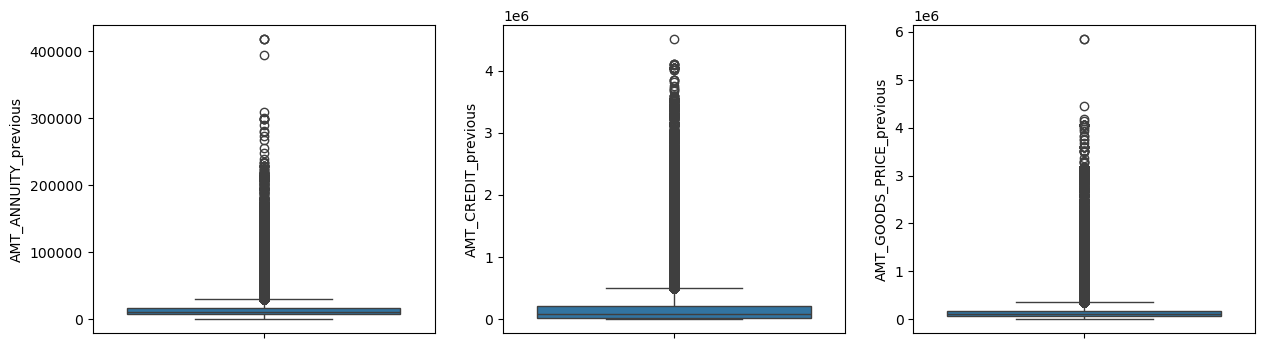

In [256]:
#AMT_ANNUITY_previous
plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
sns.boxplot(mergedata.AMT_ANNUITY_previous)

plt.subplot(1,3,2)
sns.boxplot(mergedata.AMT_CREDIT_previous)

plt.subplot(1,3,3)
sns.boxplot(mergedata.AMT_GOODS_PRICE_previous)
plt.show()

In [257]:
# Treating outlirers of AMT_ANNUITY_previous column

Q3=mergedata.AMT_ANNUITY_previous.quantile(0.75)
Q1=mergedata.AMT_ANNUITY_previous.quantile(0.25)
IQR=Q3-Q1
upperbound=Q3+1.5*IQR
lowerbound=Q1-1.5*IQR
print (IQR,upperbound,lowerbound)

mergedata.AMT_ANNUITY_previous=np.where(mergedata.AMT_ANNUITY_previous>upperbound,upperbound,mergedata.AMT_ANNUITY_previous)

9341.460000000001 30759.491250000003 -6606.348750000003


In [258]:
# Treating outlirers of AMT_CREDIT_previous column

Q3=mergedata.AMT_CREDIT_previous.quantile(0.75)
Q1=mergedata.AMT_CREDIT_previous.quantile(0.25)
IQR=Q3-Q1
upperbound=Q3+1.5*IQR
lowerbound=Q1-1.5*IQR
print (IQR,upperbound,lowerbound)

mergedata.AMT_CREDIT_previous=np.where(mergedata.AMT_CREDIT_previous>upperbound,upperbound,mergedata.AMT_CREDIT_previous)

190760.85 501781.275 -261262.12500000003


In [259]:
# Treating outlirers of AMT_GOODS_PRICE_previous column

Q3=mergedata.AMT_GOODS_PRICE_previous.quantile(0.75)
Q1=mergedata.AMT_GOODS_PRICE_previous.quantile(0.25)
IQR=Q3-Q1
upperbound=Q3+1.5*IQR
lowerbound=Q1-1.5*IQR
print (IQR,upperbound,lowerbound)

113625.0 350437.5 -104062.5


In [260]:
mergedata.AMT_GOODS_PRICE_previous=np.where(mergedata.AMT_GOODS_PRICE_previous>upperbound,upperbound,mergedata.AMT_GOODS_PRICE_previous)

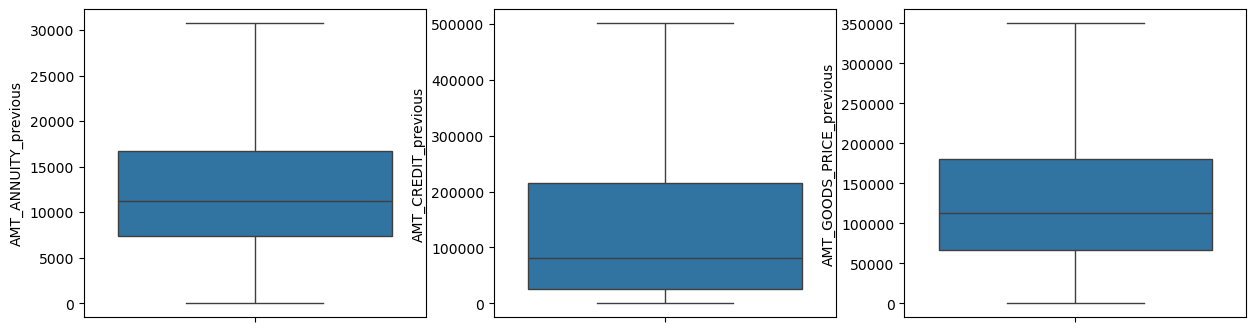

In [261]:
# After treating the outliers
plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
sns.boxplot(mergedata.AMT_ANNUITY_previous)

plt.subplot(1,3,2)
sns.boxplot(mergedata.AMT_CREDIT_previous)

plt.subplot(1,3,3)
sns.boxplot(mergedata.AMT_GOODS_PRICE_previous)
plt.show()

## Analysis

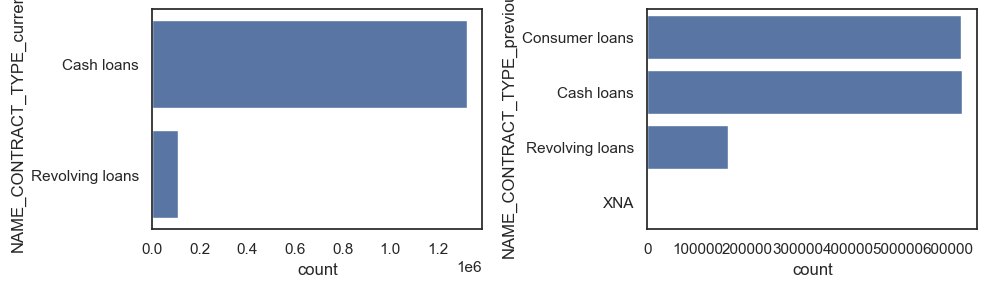

In [262]:
sns.set(style='white')
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.countplot(mergedata.NAME_CONTRACT_TYPE_current)

plt.subplot(1,2,2)
sns.countplot(mergedata.NAME_CONTRACT_TYPE_previous)
plt.subplots_adjust(left=0.05, bottom=0.05, right=0.6, top=0.6, wspace=0.5, hspace=1.0)
plt.show()

Observation:
1. The plots indicate that the previous data base has three type of loans: Cash Loans, Revolving Loans and Consumer Loans. But in current application data set, there are only cash loans and revolving loans.

2. The data also indicates that in current applications there are more cash loans that are being provided to the people and in previous data there are more consumer loans that are provided to the people


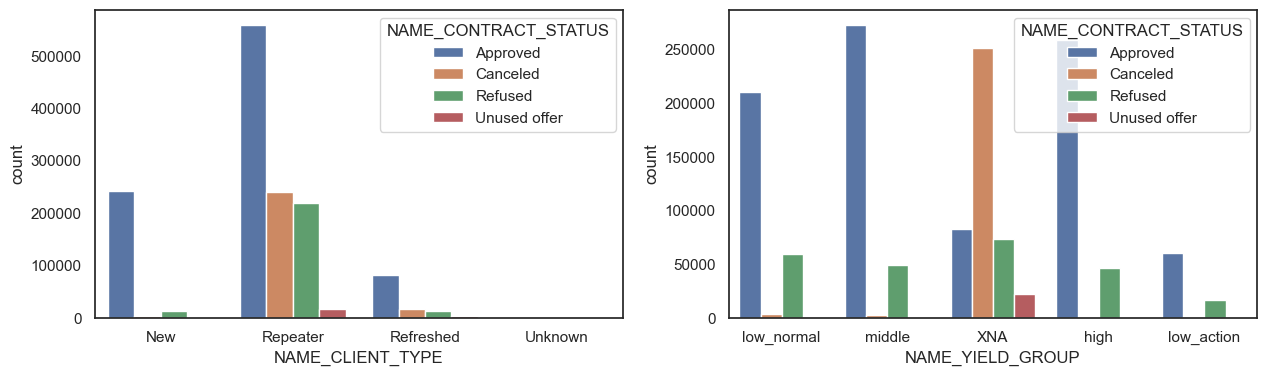

In [263]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.countplot(x = mergedata.NAME_CLIENT_TYPE,hue=mergedata.NAME_CONTRACT_STATUS)

plt.subplot(1,2,2)
sns.countplot(x = mergedata.NAME_YIELD_GROUP,hue=mergedata.NAME_CONTRACT_STATUS)
plt.show()

Observation:
1. The above plots indicate that the people who have repeated applied for loan, their loans have been approved and the count of such approved loans is maximum.

2. The people whose yield group is middle are the ones whose loans have been approved the most followed by the ones in high yield group. 



## Merging the current defaulter dataframe (appdata_1) with the prevdata dataframe

Merging the defaulters dataframe with the previous dataframe to understand weather the people in the pervious data are defaulters in current data or not

Here, We are using the defaulters data frame which is a subset of the main application_data.csv. So all the current ids in this merged data are of the people who are defaulters

In [264]:
mergedef=app_data_1.merge(prev_data,on='SK_ID_CURR',how='left',suffixes=('_current','_previous'))

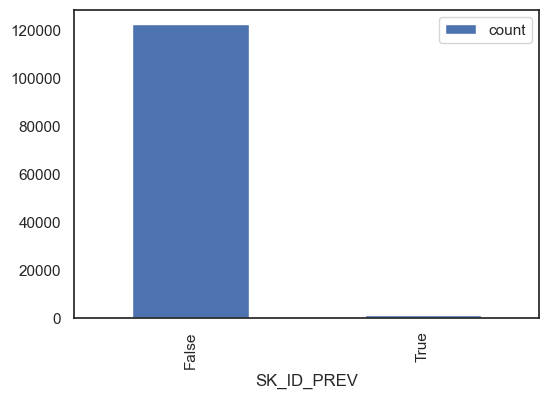

In [265]:
plt.figure(figsize=(6,4))
mergedef['SK_ID_PREV'].isnull().value_counts().plot.bar()
plt.legend()

In [266]:
mergedef.SK_ID_PREV.isnull().value_counts()

SK_ID_PREV
False    122360
True        980
Name: count, dtype: int64

The values above indicate that in the previous data we have 980 missing values of previous id corresponding to the defaulters data. So from previous data comparison there is an addition of 980 people in defaulters category presently.

Also there are 122360 applicants in the previous data who are still defaulters as per the current data application set. So 122360 people who were in previous application data set are still facing difficulties in making timely payments

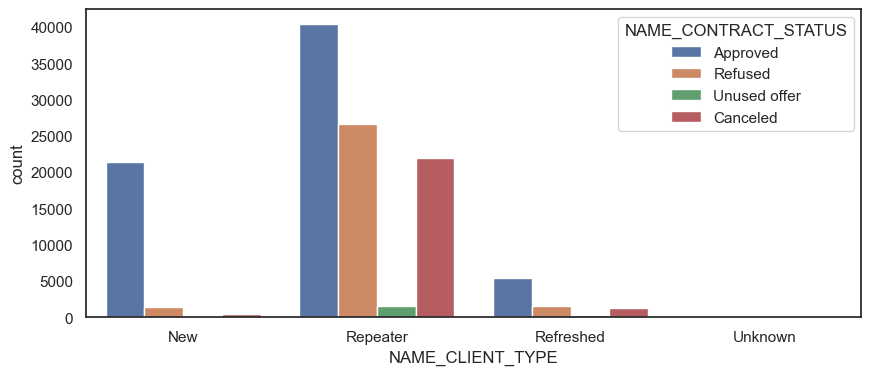

In [267]:
plt.figure(figsize=(10,4))

sns.countplot(x =mergedef.NAME_CLIENT_TYPE,hue=mergedef.NAME_CONTRACT_STATUS)
plt.show()

The observation from the above countplot is that there are more repeaters from the previous data are in the current data who have applied for loan previously and are defaulters at present.